# Comparative

* Quality Approach
* Auxiliary Approach

## Classical Metrics

* **BPCER**: Bona-fide Presentation Classification Error Rate
* **APCER**: Attack Presentation Classification Error Rate
* **ACER**: Average Classification Error Rate (ACER + BPCER) / 2

## Proposed Metrics:

* **WACER**: Weighted Average Classification Error Rate
* **SACER**: Specific Average Classification Error Rate
* **WSACER**: Weighted Specific Average Classification Error Rate

## Labeling

* Standard APCER PAIs (5 PAI species): 
  * Print
  * Replay
  * Mask
  * Makeup
  * Partial
* Specific APCER PAIs (15 PAI species):
  * Print: Low Quality, Medium Quality, High Quality
  * Replay: Low Quality, Medium Quality, High Quality
  * Mask: Paper, Rigid, Silicone
  * Makeup: Cosmetic, Impersonation, Obfuscation
  * Partial: Small, Medium, Large


>[Quality Approach](#scrollTo=93fg1V1BMiU2)

>>[Classical Metrics](#scrollTo=93fg1V1BMiU2)

>>[Proposed Metrics:](#scrollTo=93fg1V1BMiU2)

>>[Labeling](#scrollTo=93fg1V1BMiU2)

>>>[Common PAI](#scrollTo=93fg1V1BMiU2)

>>>[Specific PAI](#scrollTo=93fg1V1BMiU2)

>[Code](#scrollTo=cgAkDRFchm74)

>>[Mount Data](#scrollTo=UcLHKNW3Bf6P)

>>[Prepare Protocols names](#scrollTo=YOQ7UlZXiaVY)

>>[Show Performance Table](#scrollTo=ONRtpglwijSP)

>>[Detailed information by Protocol](#scrollTo=lMPtnMMoiwJg)



# Code

# Select your Folder

In order to mount data:

1. You have to copy the shared folder to your Drive.
2. You have to modify the following path: `pad_data_folder`

In [ ]:
#pad_data_folder = "/gdrive/My Drive/journal_2020/experiments/pad_data" # dpcabo
pad_data_folder = "/gdrive/My Drive/PhD/2019_2020/journal_2020/experiments/pad_data" # acosta
#pad_data_folder = "/gdrive/My Drive/Tesis_Artur/journal_2020/experiments/pad_data" # jalba

## 1. Mount Data

In [ ]:
import json 
import traceback
from google.colab import drive
drive.mount('/gdrive', force_remount=True)


def open_json(filename, verbose=False):
  try:
    with open(f"{pad_data_folder}/{filename}", "r") as f:
      results: dict = json.load(f)
    if verbose:
      print(f"Loaded result for {len(results.keys())} {filename}") 
  except:
    traceback.print_exc()
    print(f"Not loaded anything from {filename}") 
    results = {}
  return results

def filter_valid_protocols(results):
  fileterd_results = {}
  
  
  for protocol_name, acer_info in results.items():
  
    if "gender-bias-grad-gpad-male-" in protocol_name:
      continue
    if "gender-bias-grad-gpad-all-" in protocol_name:
      continue
    if "gender-bias-grad-gpad-female-" in protocol_name:
      continue

    if "gender-bias-hkbu-" in protocol_name:
      continue

    if "skin-tone" in protocol_name:
      if "skin-tone-bias-siw" not in protocol_name and "skin-tone-bias-siw-m" not in protocol_name and "skin-tone-bias-grad-gpad" not in protocol_name:
        continue
    
    if "age-bias" in protocol_name:
      if "age-bias-msu-mfsd" not in protocol_name and "age-bias-uvad" not in protocol_name and "age-bias-siw-m" not in protocol_name and "age-bias-replay-mobile" not in protocol_name and "age-bias-grad-gpad" not in protocol_name:
        continue

    fileterd_results[protocol_name] = acer_info
  return fileterd_results


classical_quality_results = open_json("quality_results.json", verbose=True)
age_quality_results = open_json("age_quality_results.json", verbose=True)
gender_quality_results = open_json("gender_quality_results_extension.json", verbose=True)  #gender_quality_results (42 protocols)
skin_tone_quality_results = open_json("skin_tone_quality_results.json", verbose=True)
quality_results = {**classical_quality_results, **age_quality_results, **gender_quality_results, **skin_tone_quality_results}
print(f"Filtering {len(quality_results.keys())} protocols")
quality_results = filter_valid_protocols(quality_results)
quality_grandtest_fixing_working_points = open_json("quality_grandtest_fixing_working_points.json", verbose=True)
print(f"Loaded result for {len(quality_results.keys())} Quality Protocols\n") 

classical_auxiliary_results = open_json("auxiliary_results.json", verbose=True)
age_auxiliary_results = open_json("age_auxiliary_results.json", verbose=True)
gender_auxiliary_results = open_json("gender_auxiliary_results.json", verbose=True)
skin_tone_auxiliary_results = open_json("skin_tone_auxiliary_results.json", verbose=True)
auxiliary_results = {**classical_auxiliary_results, **age_auxiliary_results, **gender_auxiliary_results, **skin_tone_auxiliary_results}
print(f"Filtering {len(auxiliary_results.keys())} protocols")
auxiliary_results = filter_valid_protocols(auxiliary_results)
auxiliary_grandtest_fixing_working_points = open_json("auxiliary_grandtest_fixing_working_points.json", verbose=True)
print(f"Loaded result for {len(auxiliary_results.keys())} Auxiliary Protocols\n") 


results = {"Quality": quality_results, "Auxiliary": auxiliary_results}

protocol_stats = open_json("protocol_stats.json")
protocol_subset_stats = open_json("protocol_subset_stats.json")
pai_datasets = open_json("pai_datasets.json")
protocol_pais_distribution = open_json("protocol_pais_distribution.json")

ramaining_protocols = set(quality_results.keys()) - set(auxiliary_results.keys())
print(f"Remaining (Auxiliary): {ramaining_protocols}")


In [ ]:
#@title 2. Prepare Protocols names & Tools


def get_fancy_name(original_protocol_name):
  new_protocol_name = original_protocol_name
  if "leave-other-datasets-out" in original_protocol_name:
    name = original_protocol_name.split("-leave-other-datasets-out")[0]
    new_protocol_name = f"LODO - {name.upper()}"

  if "cross-dataset-test-" in original_protocol_name:
    name = original_protocol_name.split("cross-dataset-test-")[1]
    new_protocol_name = f"Cross-Dataset - {name.upper()}"

  if "cross-device-test-webcam-" in original_protocol_name:
    name = original_protocol_name.split("cross-device-test-webcam-")[1]
    new_protocol_name = f"Cross-Device - {name.upper()}"

  if "unseen-attack-" in original_protocol_name:
    name = original_protocol_name.split("unseen-attack-")[1]
    new_protocol_name = f"Unseen-Attack - {name.upper()}"

  if "one-pai-" in original_protocol_name:
    name = original_protocol_name.split("one-pai-")[1]
    new_protocol_name = f"One-PAI - {name.upper()}"

  if "cross-device-test-" in original_protocol_name:
    name = original_protocol_name.split("cross-device-test-")[1]
    new_protocol_name = f"Cross-Device - {name.upper()}"

  if "gender-bias-" in original_protocol_name:
     name = original_protocol_name.split("gender-bias-")[1]
     database = name.replace("-all", "").replace("-female", "").replace("-male", "").replace("-only-siw-m-in-test", " (Only SIW-M Test)").replace("-without-siw-m", " (No SIW-M)")
     spceific = original_protocol_name.split("-")[-1]
     new_protocol_name = f"Gender - {database.upper()} - {spceific.upper()}"
  
  if "age-bias-" in original_protocol_name:
     name = original_protocol_name.split("age-bias-")[1]
     database = name.replace("-all", "").replace("-young", "").replace("-adult", "").replace("-senior", "")
     spceific = original_protocol_name.split("-")[-1]
     new_protocol_name = f"Age - {database.upper()} - {spceific.upper()}"

  if "skin-tone-bias-" in original_protocol_name:
    name = original_protocol_name.split("skin-tone-bias-")[1]
    database = name.replace("-all", "").replace("-light-yellow", "").replace("-light-pink", "").replace("-medium-pink-brown", "").replace("-medium-yellow-brown", "").replace("-medium-dark-brown", "").replace("-dark-brown", "")
    spceific = original_protocol_name.split(database)[-1][1:]
    new_protocol_name = f"Skin Tone - {database.upper()} - {spceific.upper()}"
    #print(original_protocol_name)
    #print(new_protocol_name)
    #print("----")

  new_protocol_name = new_protocol_name.replace("THREEDMAD", "3DMAD")
  return new_protocol_name

def get_fancy_names(results):
  fancy_names_results = {}
  fancy_names_results_correspondences = {}
  for original_protocol_name, protocol_data in results.items():
      new_protocol_name = get_fancy_name(original_protocol_name)
      fancy_names_results[new_protocol_name] = results[original_protocol_name]
      fancy_names_results_correspondences[new_protocol_name] = original_protocol_name
  return fancy_names_results, fancy_names_results_correspondences

fancy_names_quality_results, fancy_names_quality_results_correspondences = get_fancy_names(quality_results)
fancy_names_auxiliary_results, fancy_names_auxiliary_results_correspondences = get_fancy_names(auxiliary_results)


fancy_names_result_correspondences = {
    "Quality": fancy_names_quality_results_correspondences,
    "Auxiliary": fancy_names_auxiliary_results_correspondences
}

print(fancy_names_result_correspondences["Quality"].keys())


ramaining_protocols = [get_fancy_name(protocol) for protocol in ramaining_protocols]

fancy_protocol_stats = {}
for protocol_name, stats in protocol_stats.items():
  fancy_protocol_stats[get_fancy_name(protocol_name)] = stats


def show_pie_chart_pai_distribution(acer_info: dict, type_acer: str, title: str, colors_correspondences):
  percentage_per_pai = acer_info[type_acer]["percentage_per_pai"]
  num_samples_per_pai = acer_info[type_acer]["num_samples_per_pai"]
  labels = []
  sections = []
  colors = []

  for pai, num in num_samples_per_pai.items():
    labels.append(pai)
    sections.append(num)
    colors.append(colors_correspondences[pai])

  plt.pie(sections, labels=labels, colors=colors)
  plt.title(title)

def show_pai_distributions(acer_info):

  plt.figure(figsize=(20, 10))
  plt.subplot(121)
  show_pie_chart_pai_distribution(
      acer_info, 
      "aggregate", 
      "Common PAI Distribution",
      colors_common_pai_correspondences
  )
  plt.subplot(122)
  show_pie_chart_pai_distribution(
      acer_info, 
      "specific", 
      "Specific PAI Distribution",
      colors_specific_pai_correspondences
  )
  plt.show()

color_correspondences = {
    "ACER": "b",
    "SACER": "orange",
    "HTER": "purple",
    "BPCER": "g",
    "APCER": "r",
    "SAPCER": "goldenrod"
}

def get_list_metrics(selected_metrics):
  metrics = []
  color_palette = None
  if selected_metrics == "HTER-ACER-SACER-BPCER-APCER":
    metrics = ["ACER", "SACER", "HTER", "BPCER", "APCER"]
  elif selected_metrics == "HTER-ACER-SACER-BPCER":
    metrics = ["ACER", "SACER", "HTER", "BPCER"]
  elif selected_metrics == "HTER-ACER-SACER":
    metrics = ["ACER", "SACER", "HTER"]
  elif selected_metrics == "APCER-BPCER":
    metrics = ["APCER", "BPCER"]
  elif selected_metrics == "SAPCER-APCER-BPCER":
    metrics = ["SAPCER", "APCER", "BPCER"]
  else:
    metrics = [selected_metrics]

  color_palette = [color_correspondences.get(metric) for metric in metrics]
  return metrics, color_palette

dict_keys(['Grandtest', 'Grandtest-Without-SiW-M', 'Grandtest-Without-UVAD', 'Cross-Dataset - CASIA-FASD', 'Cross-Dataset - CSMAD', 'Cross-Dataset - HKBU', 'Cross-Dataset - MSU-MFSD', 'Cross-Dataset - OULU-NPU', 'Cross-Dataset - REPLAY-ATTACK', 'Cross-Dataset - REPLAY-MOBILE', 'Cross-Dataset - ROSE-YOUTU', 'Cross-Dataset - SIW', 'Cross-Dataset - 3DMAD', 'Cross-Dataset - UVAD', 'Cross-Dataset - SIW-M', 'Cross-Dataset - HKBUV2', 'Cross-Device - WEBCAM', 'Cross-Device - MOBILE-TABLET', 'Cross-Device - DIGITAL_CAMERA', 'Unseen-Attack - PRINT', 'Unseen-Attack - REPLAY', 'Unseen-Attack - MASK', 'Unseen-Attack - MAKEUP', 'Unseen-Attack - PARTIAL', 'LODO - CASIA-FASD', 'LODO - CSMAD', 'LODO - HKBU', 'LODO - MSU-MFSD', 'LODO - OULU-NPU', 'LODO - REPLAY-ATTACK', 'LODO - REPLAY-MOBILE', 'LODO - ROSE-YOUTU', 'LODO - SIW', 'LODO - 3DMAD', 'LODO - UVAD', 'LODO - SIW-M', 'LODO - HKBUV2', 'One-PAI - PRINT', 'One-PAI - REPLAY', 'One-PAI - MASK', 'One-PAI - MAKEUP', 'One-PAI - PARTIAL', 'Age - GRAD-GPAD

In [ ]:
#@title 3. Data (Pandas)

import pandas as pd


def get_data_frame_protocol_comparative(selected_protocol):
    data = {
    "Protocol": [],
    "HTER": [],
    "BPCER": [],
    "ACER": [],
    "WACER": [],
    "Worst PAI@ACER": [],
    "SACER": [],
    #"WSACER": [],
    "Worst PAI@SACER": [],
    }
    parsed_protocols = []
    error_protocols = []

    for approach, approach_results in results.items():

      key_selected_protocol = fancy_names_result_correspondences[approach][selected_protocol]
      performance_info = approach_results[key_selected_protocol]
      try:
        hter = performance_info.get("hter")
        acer_info = performance_info["acer_info"]
      
        # Aggregate
        aggregate_acer_info = acer_info["aggregate"]
        bpcer = aggregate_acer_info.get("bpcer")
        acer = aggregate_acer_info.get("acer")
        wrost_apcer_pai = aggregate_acer_info.get("max_apcer_pai")
        wacer = aggregate_acer_info.get("wacer")

        # Specific
        specific_acer_info = acer_info["specific"]
        sacer = specific_acer_info.get("acer")
        wrost_specific_apcer_pai = specific_acer_info.get("max_apcer_pai")
        #wsacer = specific_acer_info.get("wacer")

        data["Protocol"].append(selected_protocol)
        data["HTER"].append(hter)   
        data["BPCER"].append(bpcer)
        data["ACER"].append(acer)
        data["WACER"].append(wacer)
        data["Worst PAI@ACER"].append(wrost_apcer_pai)
        data["SACER"].append(sacer)
        #data["WSACER"].append(wsacer)
        data["Worst PAI@SACER"].append(wrost_specific_apcer_pai)
      except Exception:
        pass

    df = pd.DataFrame(data, index=results.keys(), columns = data.keys())
    return df


def get_df_data_stats(selected_protocol):
    stats = fancy_protocol_stats[selected_protocol]

    data_stats = {
    "Type Item": [],
    "Subset": [],
    "Total": []
    }
    for subset, subset_stats in stats.items():
      for label, total in subset_stats.items():
        data_stats["Subset"].append(subset)
        data_stats["Type Item"].append(label)
        data_stats["Total"].append(total)
        if total == 0:
            print(f"⚠️ >> Warning: {total} items for {label} in {subset}")


    df_stats = pd.DataFrame(data_stats)
    return df_stats

"""
for protocol_name, stats in fancy_protocol_stats.items():
  if "Gender" not in protocol_name: 
    continue
  for subset, labels in stats.items():
    for label, total in labels.items():
      #if total == 0:
      if label == "genuine" and subset == "test":
        print(f"{protocol_name}: {subset} | {label} == {total}")
"""

'\nfor protocol_name, stats in fancy_protocol_stats.items():\n  if "Gender" not in protocol_name: \n    continue\n  for subset, labels in stats.items():\n    for label, total in labels.items():\n      #if total == 0:\n      if label == "genuine" and subset == "test":\n        print(f"{protocol_name}: {subset} |\xa0{label} == {total}")\n'

In [ ]:
#@title 4. Show Performance Table
#@title Set Protocol { run: "auto" }
selected_protocol = "Grandtest" #@param ['All','Grandtest', 'Grandtest-Without-SiW-M', 'Grandtest-Without-UVAD', 'Cross-Dataset', 'LODO', 'Unseen-Attack', 'One-PAI', 'Cross-Device', 'Cross-Dataset - CASIA-FASD', 'Cross-Dataset - CSMAD', 'Cross-Dataset - HKBU', 'Cross-Dataset - MSU-MFSD', 'Cross-Dataset - OULU-NPU', 'Cross-Dataset - REPLAY-ATTACK', 'Cross-Dataset - REPLAY-MOBILE', 'Cross-Dataset - ROSE-YOUTU', 'Cross-Dataset - SIW', 'Cross-Dataset - 3DMAD', 'Cross-Dataset - UVAD', 'Cross-Dataset - SIW-M', 'Cross-Dataset - HKBUV2', 'Cross-Device - WEBCAM', 'Cross-Device - MOBILE-TABLET', 'Cross-Device - DIGITAL_CAMERA', 'Unseen-Attack - PRINT', 'Unseen-Attack - REPLAY', 'Unseen-Attack - MASK', 'LODO - CASIA-FASD', 'LODO - CSMAD', 'LODO - HKBU', 'LODO - MSU-MFSD', 'LODO - OULU-NPU', 'LODO - REPLAY-ATTACK', 'LODO - REPLAY-MOBILE', 'LODO - ROSE-YOUTU', 'LODO - SIW', 'LODO - 3DMAD', 'LODO - UVAD', 'LODO - SIW-M', 'LODO - HKBUV2', 'One-PAI - PRINT', 'One-PAI - REPLAY', 'One-PAI - MASK', 'Age - GRAD-GPAD - ALL', 'Age - GRAD-GPAD - YOUNG', 'Age - GRAD-GPAD - ADULT', 'Age - GRAD-GPAD - SENIOR', 'Age - SIW-M - ALL', 'Age - SIW-M - YOUNG', 'Age - SIW-M - ADULT', 'Age - SIW-M - SENIOR', 'Age - UVAD - ALL', 'Age - UVAD - YOUNG', 'Age - UVAD - ADULT', 'Age - UVAD - SENIOR', 'Age - REPLAY-MOBILE - ALL', 'Age - REPLAY-MOBILE - YOUNG', 'Age - REPLAY-MOBILE - ADULT', 'Age - REPLAY-MOBILE - SENIOR', 'Age - MSU-MFSD - ALL', 'Age - MSU-MFSD - YOUNG', 'Age - MSU-MFSD - ADULT', 'Age - MSU-MFSD - SENIOR', 'Gender - CASIA-FASD - ALL', 'Gender - CASIA-FASD - MALE', 'Gender - CASIA-FASD - FEMALE', 'Gender - CSMAD - ALL', 'Gender - CSMAD - MALE', 'Gender - CSMAD - FEMALE', 'Gender - MSU-MFSD - ALL', 'Gender - MSU-MFSD - MALE', 'Gender - MSU-MFSD - FEMALE', 'Gender - OULU-NPU - ALL', 'Gender - OULU-NPU - MALE', 'Gender - OULU-NPU - FEMALE', 'Gender - REPLAY-ATTACK - ALL', 'Gender - REPLAY-ATTACK - MALE', 'Gender - REPLAY-ATTACK - FEMALE', 'Gender - REPLAY-MOBILE - ALL', 'Gender - REPLAY-MOBILE - MALE', 'Gender - REPLAY-MOBILE - FEMALE', 'Gender - ROSE-YOUTU - ALL', 'Gender - ROSE-YOUTU - MALE', 'Gender - ROSE-YOUTU - FEMALE', 'Gender - SIW - ALL', 'Gender - SIW - MALE', 'Gender - SIW - FEMALE', 'Gender - 3DMAD - ALL', 'Gender - 3DMAD - MALE', 'Gender - 3DMAD - FEMALE', 'Gender - UVAD - ALL', 'Gender - UVAD - MALE', 'Gender - UVAD - FEMALE', 'Gender - SIW-M - ALL', 'Gender - SIW-M - MALE', 'Gender - SIW-M - FEMALE', 'Gender - HKBUV2 - ALL', 'Gender - HKBUV2 - MALE', 'Gender - HKBUV2 - FEMALE', 'Gender - GRAD-GPAD - ALL', 'Gender - GRAD-GPAD - MALE', 'Gender - GRAD-GPAD - FEMALE', 'Gender - GRAD-GPAD (NO SIW-M) - ALL', 'Gender - GRAD-GPAD (ONLY SIW-M TEST) - ALL', 'Gender - GRAD-GPAD (NO SIW-M) - MALE', 'Gender - GRAD-GPAD (ONLY SIW-M TEST) - MALE', 'Gender - GRAD-GPAD (NO SIW-M) - FEMALE', 'Gender - GRAD-GPAD (ONLY SIW-M TEST) - FEMALE', 'Skin Tone - GRAD-GPAD - ALL', 'Skin Tone - GRAD-GPAD - LIGHT-PINK', 'Skin Tone - GRAD-GPAD - LIGHT-YELLOW', 'Skin Tone - GRAD-GPAD - MEDIUM-PINK-BROWN', 'Skin Tone - GRAD-GPAD - MEDIUM-YELLOW-BROWN', 'Skin Tone - GRAD-GPAD - MEDIUM-DARK-BROWN', 'Skin Tone - GRAD-GPAD - DARK-BROWN', 'Skin Tone - SIW-M - ALL', 'Skin Tone - SIW-M - LIGHT-PINK', 'Skin Tone - SIW-M - LIGHT-YELLOW', 'Skin Tone - SIW-M - MEDIUM-PINK-BROWN', 'Skin Tone - SIW-M - MEDIUM-YELLOW-BROWN', 'Skin Tone - SIW-M - MEDIUM-DARK-BROWN', 'Skin Tone - SIW-M - DARK-BROWN', 'Skin Tone - SIW - ALL', 'Skin Tone - SIW - LIGHT-PINK', 'Skin Tone - SIW - LIGHT-YELLOW', 'Skin Tone - SIW - MEDIUM-PINK-BROWN', 'Skin Tone - SIW - MEDIUM-YELLOW-BROWN', 'Skin Tone - SIW - MEDIUM-DARK-BROWN', 'Skin Tone - SIW - DARK-BROWN']
import seaborn as sns

def show_protocol_stats():
  df_stats = get_df_data_stats(selected_protocol)
  #  print(df_stats)
  g = sns.FacetGrid(df_stats, col="Subset", height=3, aspect=1)
  g.map(sns.barplot, "Type Item", "Total")
  g.set(ylim=(0, 100))


#show_protocol_stats()

def get_bulk_of_protocols(protocols):
  dfs = []
  for protocol in protocols:
    if protocol in ramaining_protocols:
      print(f"Skipped {protocol} (Waiting for GPUs)")
      continue
    df = get_data_frame_protocol_comparative(protocol)
    dfs.append(df)
  df = pd.concat(dfs)
  return df

all_protocols = ['Grandtest', 'Grandtest-Without-SiW-M', 'Grandtest-Without-UVAD', 'Cross-Dataset - CASIA-FASD', 'Cross-Dataset - CSMAD', 'Cross-Dataset - HKBU', 'Cross-Dataset - MSU-MFSD', 'Cross-Dataset - OULU-NPU', 'Cross-Dataset - REPLAY-ATTACK', 'Cross-Dataset - REPLAY-MOBILE', 'Cross-Dataset - ROSE-YOUTU', 'Cross-Dataset - SIW', 'Cross-Dataset - 3DMAD', 'Cross-Dataset - UVAD', 'Cross-Dataset - SIW-M', 'Cross-Dataset - HKBUV2', 'Cross-Device - WEBCAM', 'Cross-Device - MOBILE-TABLET', 'Cross-Device - DIGITAL_CAMERA', 'Unseen-Attack - PRINT', 'Unseen-Attack - REPLAY', 'Unseen-Attack - MASK', 'LODO - CASIA-FASD', 'LODO - CSMAD', 'LODO - HKBU', 'LODO - MSU-MFSD', 'LODO - OULU-NPU', 'LODO - REPLAY-ATTACK', 'LODO - REPLAY-MOBILE', 'LODO - ROSE-YOUTU', 'LODO - SIW', 'LODO - 3DMAD', 'LODO - UVAD', 'LODO - SIW-M', 'LODO - HKBUV2', 'One-PAI - PRINT', 'One-PAI - REPLAY', 'One-PAI - MASK', 'Age - GRAD-GPAD - ALL', 'Age - GRAD-GPAD - YOUNG', 'Age - GRAD-GPAD - ADULT', 'Age - GRAD-GPAD - SENIOR', 'Age - SIW-M - ALL', 'Age - SIW-M - YOUNG', 'Age - SIW-M - ADULT', 'Age - SIW-M - SENIOR', 'Age - UVAD - ALL', 'Age - UVAD - YOUNG', 'Age - UVAD - ADULT', 'Age - UVAD - SENIOR', 'Age - REPLAY-MOBILE - ALL', 'Age - REPLAY-MOBILE - YOUNG', 'Age - REPLAY-MOBILE - ADULT', 'Age - REPLAY-MOBILE - SENIOR', 'Age - MSU-MFSD - ALL', 'Age - MSU-MFSD - YOUNG', 'Age - MSU-MFSD - ADULT', 'Age - MSU-MFSD - SENIOR', 'Gender - CASIA-FASD - ALL', 'Gender - CASIA-FASD - MALE', 'Gender - CASIA-FASD - FEMALE', 'Gender - CSMAD - ALL', 'Gender - CSMAD - MALE', 'Gender - CSMAD - FEMALE', 'Gender - MSU-MFSD - ALL', 'Gender - MSU-MFSD - MALE', 'Gender - MSU-MFSD - FEMALE', 'Gender - OULU-NPU - ALL', 'Gender - OULU-NPU - MALE', 'Gender - OULU-NPU - FEMALE', 'Gender - REPLAY-ATTACK - ALL', 'Gender - REPLAY-ATTACK - MALE', 'Gender - REPLAY-ATTACK - FEMALE', 'Gender - REPLAY-MOBILE - ALL', 'Gender - REPLAY-MOBILE - MALE', 'Gender - REPLAY-MOBILE - FEMALE', 'Gender - ROSE-YOUTU - ALL', 'Gender - ROSE-YOUTU - MALE', 'Gender - ROSE-YOUTU - FEMALE', 'Gender - SIW - ALL', 'Gender - SIW - MALE', 'Gender - SIW - FEMALE', 'Gender - 3DMAD - ALL', 'Gender - 3DMAD - MALE', 'Gender - 3DMAD - FEMALE', 'Gender - UVAD - ALL', 'Gender - UVAD - MALE', 'Gender - UVAD - FEMALE', 'Gender - SIW-M - ALL', 'Gender - SIW-M - MALE', 'Gender - SIW-M - FEMALE', 'Gender - HKBUV2 - ALL', 'Gender - HKBUV2 - MALE', 'Gender - HKBUV2 - FEMALE', 'Gender - GRAD-GPAD - ALL', 'Gender - GRAD-GPAD - MALE', 'Gender - GRAD-GPAD - FEMALE', 'Gender - GRAD-GPAD (NO SIW-M) - ALL', 'Gender - GRAD-GPAD (ONLY SIW-M TEST) - ALL', 'Gender - GRAD-GPAD (NO SIW-M) - MALE', 'Gender - GRAD-GPAD (ONLY SIW-M TEST) - MALE', 'Gender - GRAD-GPAD (NO SIW-M) - FEMALE', 'Gender - GRAD-GPAD (ONLY SIW-M TEST) - FEMALE', 'Skin Tone - GRAD-GPAD - ALL', 'Skin Tone - GRAD-GPAD - LIGHT-PINK', 'Skin Tone - GRAD-GPAD - LIGHT-YELLOW', 'Skin Tone - GRAD-GPAD - MEDIUM-PINK-BROWN', 'Skin Tone - GRAD-GPAD - MEDIUM-YELLOW-BROWN', 'Skin Tone - GRAD-GPAD - MEDIUM-DARK-BROWN', 'Skin Tone - GRAD-GPAD - DARK-BROWN', 'Skin Tone - SIW-M - ALL', 'Skin Tone - SIW-M - LIGHT-PINK', 'Skin Tone - SIW-M - LIGHT-YELLOW', 'Skin Tone - SIW-M - MEDIUM-PINK-BROWN', 'Skin Tone - SIW-M - MEDIUM-YELLOW-BROWN', 'Skin Tone - SIW-M - MEDIUM-DARK-BROWN', 'Skin Tone - SIW-M - DARK-BROWN', 'Skin Tone - SIW - ALL', 'Skin Tone - SIW - LIGHT-PINK', 'Skin Tone - SIW - LIGHT-YELLOW', 'Skin Tone - SIW - MEDIUM-PINK-BROWN', 'Skin Tone - SIW - MEDIUM-YELLOW-BROWN', 'Skin Tone - SIW - MEDIUM-DARK-BROWN', 'Skin Tone - SIW - DARK-BROWN']

# show summary table
if selected_protocol == "All":
  df = get_bulk_of_protocols(all_protocols)
elif selected_protocol == "Cross-Dataset":
  cross_dataset_protocol = [protocol for protocol in all_protocols if "Cross-Dataset" in protocol]
  df = get_bulk_of_protocols(cross_dataset_protocol) 
elif selected_protocol == "LODO":
  cross_dataset_protocol = [protocol for protocol in all_protocols if "LODO" in protocol]
  df = get_bulk_of_protocols(cross_dataset_protocol) 
elif selected_protocol == "Unseen-Attack":
  cross_dataset_protocol = [protocol for protocol in all_protocols if "Unseen-Attack" in protocol]
  df = get_bulk_of_protocols(cross_dataset_protocol) 
elif selected_protocol == "One-PAI":
  cross_dataset_protocol = [protocol for protocol in all_protocols if "One-PAI" in protocol]
  df = get_bulk_of_protocols(cross_dataset_protocol) 
elif selected_protocol == "Cross-Device":
  cross_dataset_protocol = [protocol for protocol in all_protocols if "Cross-Device" in protocol]
  df = get_bulk_of_protocols(cross_dataset_protocol) 
else:
  if selected_protocol in ramaining_protocols:
      print(f"Skipped {selected_protocol} (Waiting for GPUs)")
  else:
    df = get_data_frame_protocol_comparative(selected_protocol)

df


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Protocol,HTER,BPCER,ACER,WACER,Worst PAI@ACER,SACER,Worst PAI@SACER
Quality,Grandtest,15.413704,17.711530,41.995300,15.433295,partial,58.855765,makeup_obfuscation
Auxiliary,Grandtest,9.057722,11.849585,44.296885,9.052842,partial,47.270946,partial_medium


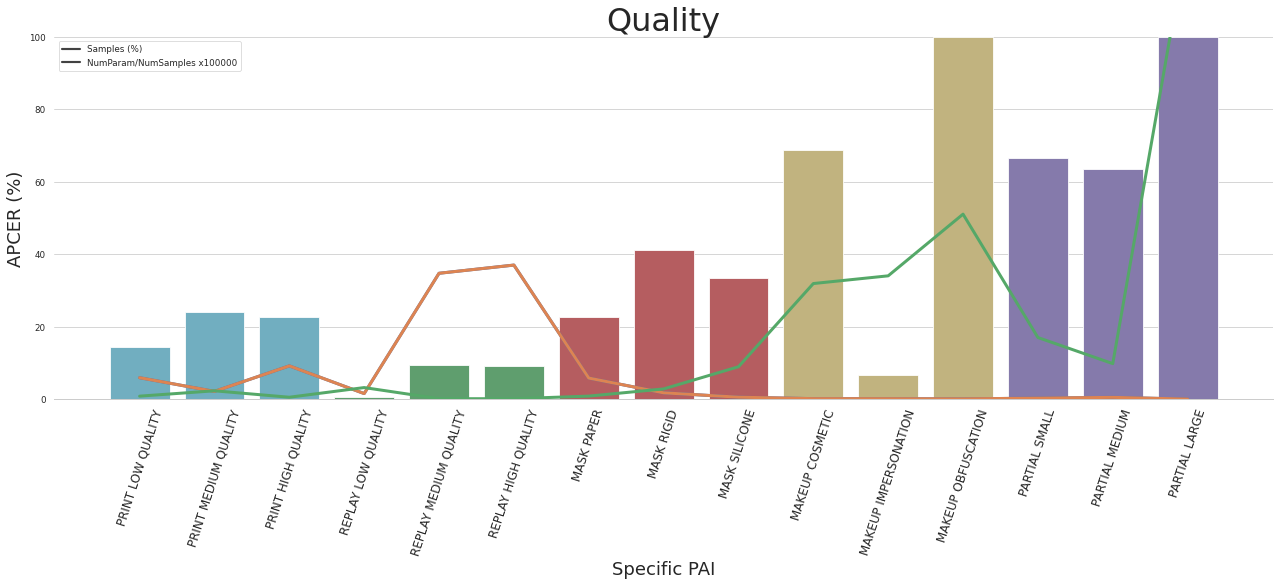

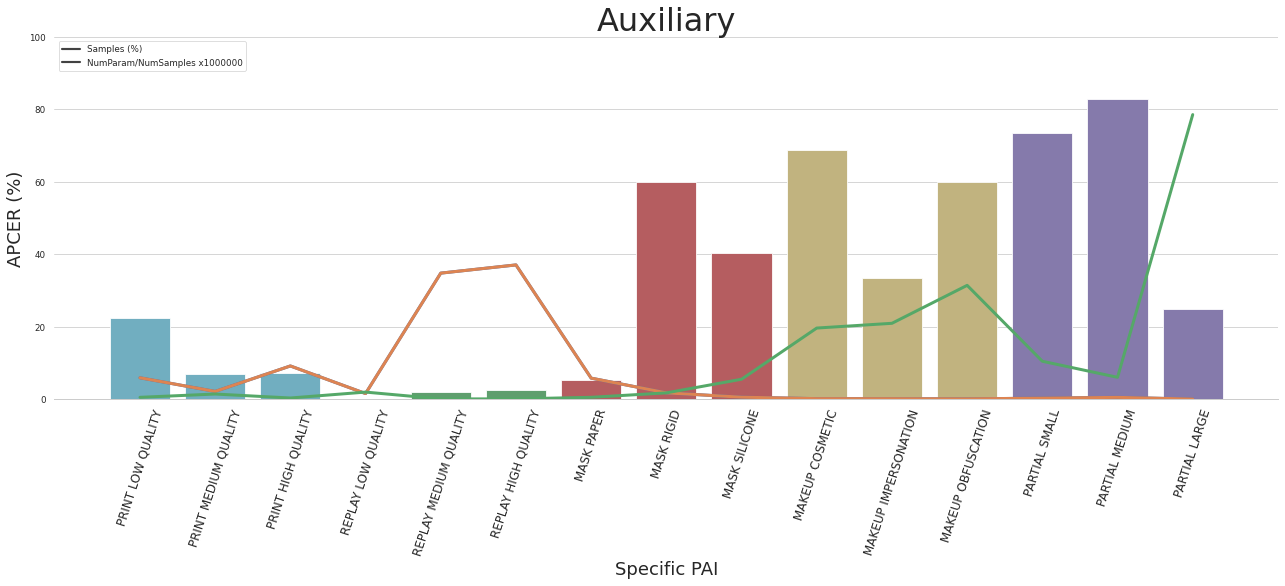

In [ ]:
#@title Set Protocol { run: "auto" }
selected_protocol = "Grandtest" #@param ['Grandtest', 'Grandtest-Without-SiW-M', 'Grandtest-Without-UVAD','Cross-Dataset - CASIA-FASD', 'Cross-Dataset - CSMAD', 'Cross-Dataset - HKBU', 'Cross-Dataset - MSU-MFSD', 'Cross-Dataset - OULU-NPU', 'Cross-Dataset - REPLAY-ATTACK', 'Cross-Dataset - REPLAY-MOBILE', 'Cross-Dataset - ROSE-YOUTU', 'Cross-Dataset - SIW', 'Cross-Dataset - 3DMAD', 'Cross-Dataset - UVAD', 'Cross-Dataset - SIW-M', 'Cross-Dataset - HKBUV2', 'Cross-Device - WEBCAM', 'Cross-Device - MOBILE-TABLET', 'Cross-Device - DIGITAL_CAMERA', 'Unseen-Attack - PRINT', 'Unseen-Attack - REPLAY', 'Unseen-Attack - MASK', 'LODO - CASIA-FASD', 'LODO - CSMAD', 'LODO - HKBU', 'LODO - MSU-MFSD', 'LODO - OULU-NPU', 'LODO - REPLAY-ATTACK', 'LODO - REPLAY-MOBILE', 'LODO - ROSE-YOUTU', 'LODO - SIW', 'LODO - 3DMAD', 'LODO - UVAD', 'LODO - SIW-M', 'LODO - HKBUV2', 'One-PAI - PRINT', 'One-PAI - REPLAY', 'One-PAI - MASK', 'Age - GRAD-GPAD - ALL', 'Age - GRAD-GPAD - YOUNG', 'Age - GRAD-GPAD - ADULT', 'Age - GRAD-GPAD - SENIOR', 'Age - SIW-M - ALL', 'Age - SIW-M - YOUNG', 'Age - SIW-M - ADULT', 'Age - SIW-M - SENIOR', 'Age - UVAD - ALL', 'Age - UVAD - YOUNG', 'Age - UVAD - ADULT', 'Age - UVAD - SENIOR', 'Age - REPLAY-MOBILE - ALL', 'Age - REPLAY-MOBILE - YOUNG', 'Age - REPLAY-MOBILE - ADULT', 'Age - REPLAY-MOBILE - SENIOR', 'Age - MSU-MFSD - ALL', 'Age - MSU-MFSD - YOUNG', 'Age - MSU-MFSD - ADULT', 'Age - MSU-MFSD - SENIOR', 'Gender - CASIA-FASD - ALL', 'Gender - CASIA-FASD - MALE', 'Gender - CASIA-FASD - FEMALE', 'Gender - CSMAD - ALL', 'Gender - CSMAD - MALE', 'Gender - CSMAD - FEMALE', 'Gender - MSU-MFSD - ALL', 'Gender - MSU-MFSD - MALE', 'Gender - MSU-MFSD - FEMALE', 'Gender - OULU-NPU - ALL', 'Gender - OULU-NPU - MALE', 'Gender - OULU-NPU - FEMALE', 'Gender - REPLAY-ATTACK - ALL', 'Gender - REPLAY-ATTACK - MALE', 'Gender - REPLAY-ATTACK - FEMALE', 'Gender - REPLAY-MOBILE - ALL', 'Gender - REPLAY-MOBILE - MALE', 'Gender - REPLAY-MOBILE - FEMALE', 'Gender - ROSE-YOUTU - ALL', 'Gender - ROSE-YOUTU - MALE', 'Gender - ROSE-YOUTU - FEMALE', 'Gender - SIW - ALL', 'Gender - SIW - MALE', 'Gender - SIW - FEMALE', 'Gender - 3DMAD - ALL', 'Gender - 3DMAD - MALE', 'Gender - 3DMAD - FEMALE', 'Gender - UVAD - ALL', 'Gender - UVAD - MALE', 'Gender - UVAD - FEMALE', 'Gender - SIW-M - ALL', 'Gender - SIW-M - MALE', 'Gender - SIW-M - FEMALE', 'Gender - HKBUV2 - ALL', 'Gender - HKBUV2 - MALE', 'Gender - HKBUV2 - FEMALE', 'Gender - GRAD-GPAD - ALL', 'Gender - GRAD-GPAD - MALE', 'Gender - GRAD-GPAD - FEMALE', 'Gender - GRAD-GPAD (NO SIW-M) - ALL', 'Gender - GRAD-GPAD (ONLY SIW-M TEST) - ALL', 'Gender - GRAD-GPAD (NO SIW-M) - MALE', 'Gender - GRAD-GPAD (ONLY SIW-M TEST) - MALE', 'Gender - GRAD-GPAD (NO SIW-M) - FEMALE', 'Gender - GRAD-GPAD (ONLY SIW-M TEST) - FEMALE', 'Skin Tone - GRAD-GPAD - ALL', 'Skin Tone - GRAD-GPAD - LIGHT-PINK', 'Skin Tone - GRAD-GPAD - LIGHT-YELLOW', 'Skin Tone - GRAD-GPAD - MEDIUM-PINK-BROWN', 'Skin Tone - GRAD-GPAD - MEDIUM-YELLOW-BROWN', 'Skin Tone - GRAD-GPAD - MEDIUM-DARK-BROWN', 'Skin Tone - GRAD-GPAD - DARK-BROWN', 'Skin Tone - SIW-M - ALL', 'Skin Tone - SIW-M - LIGHT-PINK', 'Skin Tone - SIW-M - LIGHT-YELLOW', 'Skin Tone - SIW-M - MEDIUM-PINK-BROWN', 'Skin Tone - SIW-M - MEDIUM-YELLOW-BROWN', 'Skin Tone - SIW-M - MEDIUM-DARK-BROWN', 'Skin Tone - SIW-M - DARK-BROWN', 'Skin Tone - SIW - ALL', 'Skin Tone - SIW - LIGHT-PINK', 'Skin Tone - SIW - LIGHT-YELLOW', 'Skin Tone - SIW - MEDIUM-PINK-BROWN', 'Skin Tone - SIW - MEDIUM-YELLOW-BROWN', 'Skin Tone - SIW - MEDIUM-DARK-BROWN', 'Skin Tone - SIW - DARK-BROWN']

show_all = False

selected_metrics = "APCER"

selected_protocol = fancy_names_quality_results_correspondences[selected_protocol]

quality_performance_info = quality_results.get(selected_protocol)
quality_acer_info = quality_performance_info.get("acer_info")

auxiliary_performance_info = auxiliary_results.get(selected_protocol)
auxiliary_acer_info = auxiliary_performance_info.get("acer_info")

def get_df_apecer_by_pai(performance_info):
  data = {
  "APCER (%)": [],
  "Common PAI": [],
  "Specific PAI": [],
  "Samples (%)": []
  }

  try:
    acer_info = performance_info.get("acer_info")
    aggregate_apcer_per_pai = acer_info.get("aggregate", {}).get("apcer_per_pai")
    specific_apcer_per_pai = acer_info.get("specific", {}).get("apcer_per_pai")

    for pai, apcer in aggregate_apcer_per_pai.items():
      num_samples = acer_info.get("aggregate", {}).get("percentage_per_pai", {}).get(pai)
      pai = pai.upper().replace("_", " ")
    
      if show_all:
        data["APCER (%)"].append(apcer)
        data["Common PAI"].append(pai)
        data["Specific PAI"].append(f"{pai} ALL")
        data["Samples (%)"].append(num_samples)

      for spai, sapcer in specific_apcer_per_pai.items():

        snum_samples = acer_info.get("specific", {}).get("percentage_per_pai", {}).get(spai)
        spai = spai.upper().replace("_", " ")

        if pai not in spai:
          continue
        data["APCER (%)"].append(sapcer)
        data["Common PAI"].append(spai.split(" ")[0])
        data["Specific PAI"].append(spai)
        data["Samples (%)"].append(snum_samples)

  except Exception as err:
    print(err)
    pass


  df_metrics = pd.DataFrame(data, columns = data.keys())
  return df_metrics

def show_bar_metrics_by_pai(df_metrics, approach, max_apcer):
  if df_metrics.empty == True:
    print(f"⚠️ >> Warning: {approach} is not available yet")
  else:
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.set(style="whitegrid")
    sns.set_context("paper", rc={"font.size":14,"axes.titlesize":32,"axes.labelsize":18})   

    if show_all:
      palette = ["c", "c", "c", "c", "g", "g", "g", "g", "r", "r", "r", "r", "y", "y", "y", "y", "m", "m", "m", "m"]
    else:
      palette = ["c", "c", "c", "g", "g", "g", "r", "r", "r", "y", "y", "y", "m", "m", "m"]

    
    g = sns.catplot(x='Specific PAI', y='APCER (%)', data=df_metrics, kind='bar', height=6, aspect=3, palette=palette)
    g.set(ylim=(0, max_apcer))
    g.set_xticklabels(rotation=72, fontsize=12)
    g.set(title = approach)

    plt.plot(df_metrics["Specific PAI"], df_metrics["Samples (%)"], linewidth=3)

    plt.plot(df_metrics["Specific PAI"], df_metrics["Samples (%)"], linewidth=3)


    if approach == "Auxiliary":
      total_parameters = 3065742
      scale = 1000000
    else:
      n_support_vector_per_class = [1967, 1631]
      total_parameters = (sum(n_support_vector_per_class)*139) +2
      scale = 100000
      
    label = f"NumParam/NumSamples x{scale}"

    param_samples = total_parameters/df_metrics["Samples (%)"]
    param_samples = param_samples/scale

    plt.plot(df_metrics["Specific PAI"], param_samples, linewidth=3)


    plt.legend(["Samples (%)", label], loc='upper left')


    g.despine(left=True)





df_metrics_quality_by_pai = get_df_apecer_by_pai(quality_results.get(selected_protocol))
df_metrics_auxiliary_by_pai = get_df_apecer_by_pai(auxiliary_results.get(selected_protocol))

max_quality = df_metrics_quality_by_pai.max()
max_auxiliary = df_metrics_auxiliary_by_pai.max()

max_apcer = max(max_quality["APCER (%)"], max_auxiliary["APCER (%)"])

max_samples = max(max_quality["Samples (%)"], max_auxiliary["Samples (%)"])

max_value = max(max_apcer, max_samples)

show_bar_metrics_by_pai(df_metrics_quality_by_pai, "Quality", max_value)
show_bar_metrics_by_pai(df_metrics_auxiliary_by_pai, "Auxiliary", max_value)


pais_correspondences = {
    0: "Genuine",
    1: "Print Low Quality",
    2: "Print Medium Quality",
    3: "Print High Quality",
    4: "Replay Low Quality",
    5: "Replay Medium Quality",
    6: "Replay High Quality",
    7: "Mask Paper",
    8: "Mask Rigid",
    9: "Mask Silicon",
    10: "Makeup Cosmetic",
    11: "Makeup Impersonation",
    12: "Makeup Obfuscation",
    13: "Partial Small",
    14: "Partial Medium",
    15: "Partial Large",
}

data = {
"Common PAI": [],
"Num Datasets": [],
"Datasets": []
}

for common_pai, stats in pai_datasets.items():
  if common_pai == "0":
    continue
  data["Common PAI"].append(pais_correspondences.get(int(common_pai)))
  data["Num Datasets"].append(stats["num_datasets"])
  data["Datasets"].append(str(stats["datasets"]))


df_pai_dataset = pd.DataFrame(data, columns = data.keys())
#print(df_pai_dataset.to_string())



## 5. Protocol Comparatives (Quality, Auxiliary)

* LODO
* Cross-Dataset
* Unseen-Attack
* One-PAI
* Cross-Device


filtered_protocols: ['Unseen-Attack - PRINT', 'Unseen-Attack - REPLAY', 'Unseen-Attack - MASK', 'Unseen-Attack - MAKEUP', 'Unseen-Attack - PARTIAL']
Quality   | AGER: 43.10 | SAGER: 51.71
Auxiliary | AGER: 22.74 | SAGER: 31.03


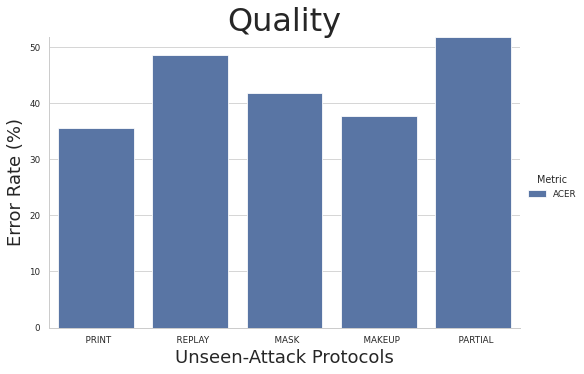

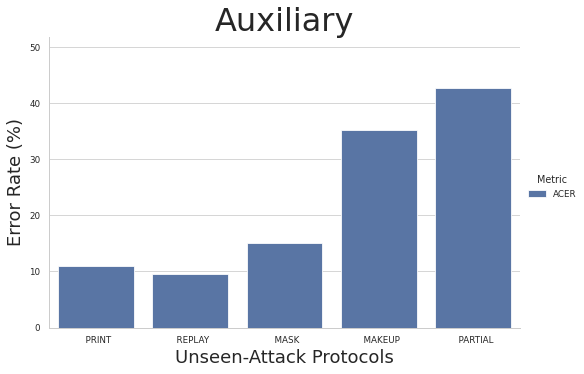

In [ ]:
#@title Classical Protocols Protocol { run: "auto" }
selected_protocol = "Cross-Device" #@param ['LODO', 'Cross-Dataset', 'Unseen-Attack', 'One-PAI', 'Cross-Device']
selected_metrics = "ACER" #@param ['SAPCER-APCER-BPCER', 'APCER-BPCER','HTER-ACER-SACER-BPCER-APCER', 'HTER-ACER-SACER', 'HTER-ACER-SACER-BPCER', 'HTER', 'ACER', 'SACER']


def get_df_metrics_by_protocol(metrics, selected_protocol, filtered_protocols, results, results_correspondences):
  protocols_key= f"{selected_protocol} Protocols"
  
  data = {
  "Metric": [],
  "Error Rate (%)": [],
  protocols_key: []
  }

  for protocol in filtered_protocols:
    try:
      performance_info = results[results_correspondences[protocol]]
      acer_info = performance_info["acer_info"]
      for metric in metrics:
        data["Metric"].append(metric)
        if metric == "BPCER":
          metric_value = performance_info.get("acer_info", {}).get("aggregate", {}).get("bpcer")
        elif metric == "APCER":
          max_apcer_pai = performance_info.get("acer_info", {}).get("aggregate", {}).get("max_apcer_pai")
          metric_value = performance_info.get("acer_info", {}).get("aggregate", {}).get("apcer_per_pai", {}).get(max_apcer_pai)
        elif metric == "SAPCER":
          max_apcer_pai = performance_info.get("acer_info", {}).get("specific", {}).get("max_apcer_pai")
          metric_value = performance_info.get("acer_info", {}).get("specific", {}).get("apcer_per_pai", {}).get(max_apcer_pai)
        else:
          metric_value = performance_info.get(metric.lower())
        data["Error Rate (%)"].append(metric_value)
        data[protocols_key].append(protocol.replace(f"{selected_protocol}", "").replace("-", ""))
    except:
      pass

  df_metrics = pd.DataFrame(data, columns = data.keys())
  return df_metrics

def show_bar_metrics_by_protocol(df_metrics, approach, selected_protocol, max_error_rate, color_palette=None):
  if df_metrics.empty == True:
    print(f"⚠️ >> Warning: {approach} is not available yet")
  else:
    import seaborn as sns
    sns.set(style="whitegrid")
    sns.set_context("paper", rc={"font.size":14,"axes.titlesize":32,"axes.labelsize":18})   
    
    height = 5
    aspect = 1.5
    if selected_protocol in ["LODO", "Cross-Dataset"]:
      height = 8
      aspect = 3

    g = sns.catplot(x=f'{selected_protocol} Protocols', y='Error Rate (%)', hue='Metric', data=df_metrics, kind='bar', height=height, aspect=aspect, palette=color_palette)
    g.set(ylim=(0, max_error_rate))
    #g.set_xticklabels(rotation=70)
    g.set(title = approach)


metrics, color_palette = get_list_metrics(selected_metrics)


def get_filtered_and_sorted_protocols():
  filtered_protocols = [k for k in fancy_names_quality_results_correspondences.keys() if selected_protocol in k]
  
  predefined_order = {
      "CASIA-FASD": 1,    # Print, Replay
      "REPLAY-ATTACK": 2, # Print, Replay
      "REPLAY-MOBILE": 3, # Print, Replay
      "MSU-MFSD": 4,      # Print, Replay
      "OULU-NPU": 5,      # Print, Replay
      "SIW": 6,          # Print, Replay
      "UVAD": 7,        # Replay
      "3DMAD": 8,        # Mask
      "HKBU": 9,         # Mask
      "HKBUV2": 10,       # Mask
      "CSMAD": 11,       # Print, Mask
      "ROSE-YOUTU": 12,   # Print, Replay, Mask
      "SIW-M": 13         # Print, Replay, Mask, MakeUp, Partial
  }

  ordered_filetered_protocols = {}
  for protocol in filtered_protocols:
    for k, v in predefined_order.items():
      if k in protocol:
        ordered_filetered_protocols[protocol] = v

  if len(ordered_filetered_protocols):
    sorted_protocols = [k for k, v in sorted(ordered_filetered_protocols.items(), key=lambda item: item[1])]
  else:
    sorted_protocols = filtered_protocols

  return sorted_protocols 

filtered_protocols = get_filtered_and_sorted_protocols()

print(f"filtered_protocols: {filtered_protocols}")

df_metrics_quality = get_df_metrics_by_protocol(metrics, selected_protocol, filtered_protocols, quality_results, fancy_names_quality_results_correspondences)
df_metrics_auxiliary = get_df_metrics_by_protocol(metrics, selected_protocol, filtered_protocols, auxiliary_results, fancy_names_auxiliary_results_correspondences)

max_quality = df_metrics_quality.max()
max_auxiliary = df_metrics_auxiliary.max()

max_error_rate = max(max_quality["Error Rate (%)"], max_auxiliary["Error Rate (%)"])

show_bar_metrics_by_protocol(df_metrics_quality, "Quality", selected_protocol, max_error_rate, color_palette)
show_bar_metrics_by_protocol(df_metrics_auxiliary, "Auxiliary", selected_protocol, max_error_rate, color_palette)


def calculate_average(metric, results):
  df_metrics_for_metric = get_df_metrics_by_protocol([metric], selected_protocol, filtered_protocols, results, fancy_names_quality_results_correspondences)
  average = df_metrics_for_metric["Error Rate (%)"].mean()
  return average

AGER_QUALITY = calculate_average("ACER", quality_results)
AGER_AUXILIARY = calculate_average("ACER", auxiliary_results)

SAGER_QUALITY = calculate_average("SACER", quality_results)
SAGER_AUXILIARY = calculate_average("SACER", auxiliary_results)

print(f"Quality   | AGER: {AGER_QUALITY:.2f} | SAGER: {SAGER_QUALITY:.2f}")
print(f"Auxiliary | AGER: {AGER_AUXILIARY:.2f} | SAGER: {SAGER_AUXILIARY:.2f}")


['g']


' \nprint(protocol_pais_distribution)\nmale_protocol_pais_distribution = protocol_pais_distribution[protocol_male]\nfemale_protocol_pais_distribution = protocol_pais_distribution[protocol_female]\n\nfor subsets in ["train", "devel", "test"]:\n  num_male_genuines = male_protocol_pais_distribution[subsets]["num_genuines"]\n  num_attacks = male_protocol_pais_distribution[subsets]["num_attacks"]\n  num_female_genuines = female_protocol_pais_distribution[subsets]["num_genuines"]\n  print(f"{subsets} num samples:\n\t Male Genuines: {num_male_genuines}\n\t Female Genuines: {num_female_genuines}\n\t Attacks: {num_attacks}")\n'

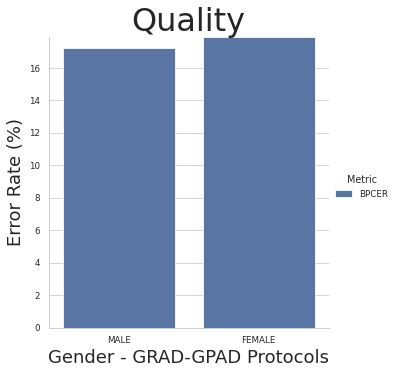

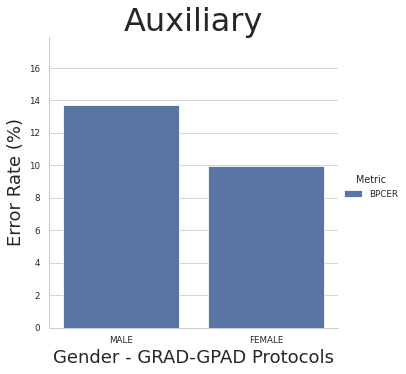

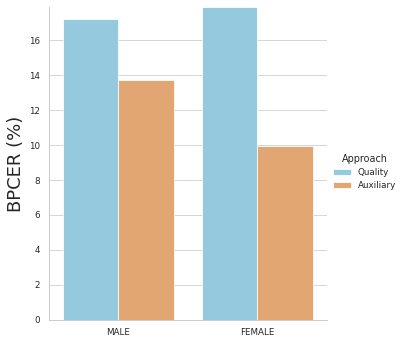

In [ ]:
#@title Gender { run: "auto" }
selected_protocol = "Gender - GRAD-GPAD" #@param ['Gender - GRAD-GPAD', 'Gender - GRAD-GPAD (ONLY SIW-M TEST)', 'Gender - GRAD-GPAD (NO SIW-M)', 'Gender - SIW', 'Gender - OULU-NPU', 'Gender - ROSE-YOUTU', 'Gender - SIW-M', 'Gender - HKBUV2', 'Gender - UVAD', 'Gender - 3DMAD', 'Gender - CASIA-FASD', 'Gender - REPLAY-ATTACK', 'Gender - MSU-MFSD', 'Gender - CSMAD']
selected_metrics = "BPCER" #@param ['BPCER', 'APCER-BPCER', 'SAPCER-APCER-BPCER','HTER-ACER-SACER', 'HTER-ACER-SACER-BPCER', 'HTER', 'ACER', 'SACER']

#@markdown Gender protocols:
#@markdown * GRAD-GPAD: 583 Items per Gender (Test)
#@markdown * GRAD-GPAD (Onlu SIW-M in test): 583 Items per Gender (Test)
#@markdown * GRAD-GPAD (Without SIW-M): 514 Items per Gender (Test)
#@markdown * SIW: 160 Items per Gender (Test)
#@markdown * OULU-NPU: 108 Items per Gender (Test)
#@markdown * ROSE-YOUTU: 75 Items per Gender (Test)
#@markdown * SIW-M: 69 Items per Gender (Test)
#@markdown * HKBUv2: 42 Items per Gender (Test)
#@markdown * UVAD: 38 Items per Gender (Test)
#@markdown * REPLAY-MOBILE: 30 Items per Gender (Test)
#@markdown * 3DMAD: 20 Items per Gender (Test)
#@markdown * CASIA-FASD: 15 Items per Gender (Test)
#@markdown * REPLAY-ATTACK: 12 Items per Gender (Test)
#@markdown * MSU-MFSD: 10 Items per Gender (Test)
#@markdown * CSMAD: 4 Items per Gender (Test)
#@markdown * HKBU: **0** Items per Gender (Test) (**NOT AVAILABLE**)


def get_df_metrics_by_protocol(metrics, selected_protocol, filtered_protocols, results, results_correspondences):
  protocols_key= f"{selected_protocol} Protocols"
  
  data = {
  "Metric": [],
  "Error Rate (%)": [],
  protocols_key: []
  }

  for protocol in filtered_protocols:
    try:
      subprotocol = protocol.replace(f"{selected_protocol}", "").replace("-", "").replace(" ", "")
      if subprotocol == "ALL":
        continue
      performance_info = results[results_correspondences[protocol]]
      acer_info = performance_info["acer_info"]
      for metric in metrics:
        data["Metric"].append(metric)
        if metric == "BPCER":
          metric_value = performance_info.get("acer_info", {}).get("aggregate", {}).get("bpcer")
        elif metric == "APCER":
          max_apcer_pai = performance_info.get("acer_info", {}).get("aggregate", {}).get("max_apcer_pai")
          metric_value = performance_info.get("acer_info", {}).get("aggregate", {}).get("apcer_per_pai", {}).get(max_apcer_pai)
        elif metric == "SAPCER":
          max_apcer_pai = performance_info.get("acer_info", {}).get("specific", {}).get("max_apcer_pai")
          metric_value = performance_info.get("acer_info", {}).get("specific", {}).get("apcer_per_pai", {}).get(max_apcer_pai)
        else:
          metric_value = performance_info.get(metric.lower())
        data["Error Rate (%)"].append(metric_value)
        data[protocols_key].append(subprotocol)
    except:
      pass

  df_metrics = pd.DataFrame(data, columns = data.keys())
  return df_metrics

def show_bar_metrics_by_protocol(df_metrics, approach, selected_protocol, max_error_rate, color_palette=None):
  if df_metrics.empty == True:
    print(f"⚠️ >> Warning: {approach} is not available yet")
  else:
    import seaborn as sns
    sns.set(style="whitegrid")
    sns.set_context("paper", rc={"font.size":14,"axes.titlesize":32,"axes.labelsize":18})   
    g = sns.catplot(x=f'{selected_protocol} Protocols', y='Error Rate (%)', hue='Metric', data=df_metrics, kind='bar', height=5, aspect=1, palette=None)
    g.set(ylim=(0, max_error_rate))
    #g.set_xticklabels(rotation=70)
    g.set(title = approach)


def show_comparison(quality_df_metrics, auxiliary_df_metrics, selected_protocol, max_error_rate):

  quality_df_metrics["Approach"] = ["Quality", "Quality"]
  auxiliary_df_metrics["Approach"] = ["Auxiliary", "Auxiliary"]

  df_metrics = pd.concat([quality_df_metrics, auxiliary_df_metrics])
  
  df_metrics.rename(columns={'Error Rate (%)':'BPCER (%)'}, inplace=True)
  df_metrics.rename(columns={f'{selected_protocol} Protocols':''}, inplace=True)

  if df_metrics.empty == True:
    print(f"⚠️ >> Warning: {approach} is not available yet")
  else:
    import seaborn as sns
    sns.set(style="whitegrid")
    sns.set_context("paper", rc={"font.size":14,"axes.titlesize":32,"axes.labelsize":18})   
    g = sns.catplot(x='', y='BPCER (%)', hue='Approach', data=df_metrics, kind='bar', height=5, aspect=1, palette=['skyblue', 'sandybrown'])
    g.set(ylim=(0, max_error_rate))

    print(color_palette)
    #g.set_xticklabels(rotation=70)
    #g.set(title = approach)

metrics, color_palette = get_list_metrics(selected_metrics)


filtered_protocols = [k for k in fancy_names_quality_results_correspondences.keys() if selected_protocol in k]

if selected_protocol == "Gender - GRAD-GPAD":
  filtered_protocols = [k for k in filtered_protocols if "(ONLY SIW-M TEST)" not in k and "(NO SIW-M)" not in k]

df_metrics_quality = get_df_metrics_by_protocol(metrics, selected_protocol, filtered_protocols, quality_results, fancy_names_quality_results_correspondences)
df_metrics_auxiliary = get_df_metrics_by_protocol(metrics, selected_protocol, filtered_protocols, auxiliary_results, fancy_names_auxiliary_results_correspondences)

max_quality = df_metrics_quality.max()
max_auxiliary = df_metrics_auxiliary.max()

max_error_rate = max(max_quality["Error Rate (%)"], max_auxiliary["Error Rate (%)"])

show_bar_metrics_by_protocol(df_metrics_quality, "Quality", selected_protocol, max_error_rate, color_palette)
show_bar_metrics_by_protocol(df_metrics_auxiliary, "Auxiliary", selected_protocol, max_error_rate, color_palette)

show_comparison(df_metrics_quality, df_metrics_auxiliary, selected_protocol, max_error_rate)


protocol_male = [protocol for protocol in filtered_protocols if "male" in protocol]
protocol_female = [protocol for protocol in filtered_protocols if "female" in protocol]

""" 
print(protocol_pais_distribution)
male_protocol_pais_distribution = protocol_pais_distribution[protocol_male]
female_protocol_pais_distribution = protocol_pais_distribution[protocol_female]

for subsets in ["train", "devel", "test"]:
  num_male_genuines = male_protocol_pais_distribution[subsets]["num_genuines"]
  num_attacks = male_protocol_pais_distribution[subsets]["num_attacks"]
  num_female_genuines = female_protocol_pais_distribution[subsets]["num_genuines"]
  print(f"{subsets} num samples:\n\t Male Genuines: {num_male_genuines}\n\t Female Genuines: {num_female_genuines}\n\t Attacks: {num_attacks}")
"""




['g']


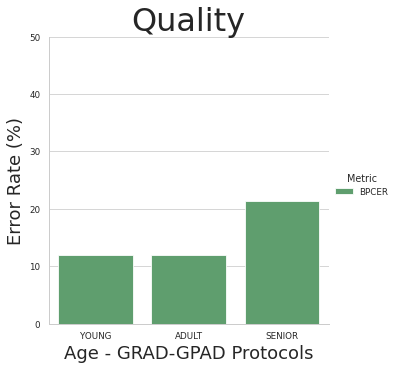

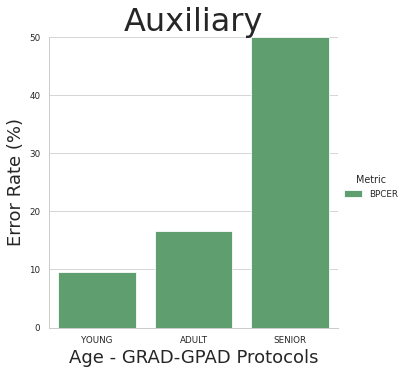

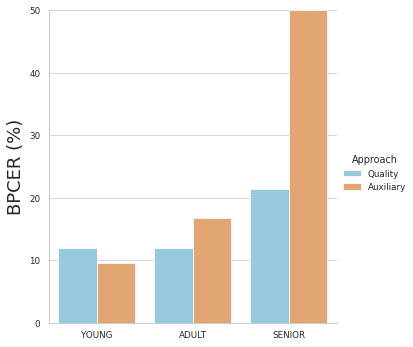

In [ ]:
#@title Age { run: "auto" }
selected_protocol = "Age - GRAD-GPAD" #@param ['Age - GRAD-GPAD', 'Age - SIW-M', 'Age - REPLAY-MOBILE', 'Age - UVAD','Age - MSU-MFSD']
selected_metrics = "BPCER" #@param ['BPCER', 'APCER-BPCER','HTER-ACER-SACER', 'HTER-ACER-SACER-BPCER', 'HTER', 'ACER', 'SACER']

#@markdown Age protocols:
#@markdown * GRAD-GPAD: 42 Items per Age (Test)
#@markdown * SIW-M: 24 Items per Age (Test)
#@markdown * REPLAY-MOBILE: 10 Items per Age (Test)
#@markdown * UVAD: 6 Items per Age (Test)
#@markdown * MSU-MFSD: 2 Items per Age (Test)

def get_df_metrics_by_protocol(metrics, selected_protocol, filtered_protocols, results, results_correspondences):
  protocols_key= f"{selected_protocol} Protocols"
  
  data = {
  "Metric": [],
  "Error Rate (%)": [],
  protocols_key: []
  }

  for protocol in filtered_protocols:
    try:
      subprotcol = protocol.replace(f"{selected_protocol}", "").replace("-", "").replace(" ", "")
      if subprotcol == "ALL":
        continue
      performance_info = results[results_correspondences[protocol]]
      acer_info = performance_info["acer_info"]
      for metric in metrics:
        data["Metric"].append(metric)
        if metric == "BPCER":
          metric_value = performance_info.get("acer_info", {}).get("aggregate", {}).get("bpcer")
        elif metric == "APCER":
          max_apcer_pai = performance_info.get("acer_info", {}).get("aggregate", {}).get("max_apcer_pai")
          metric_value = performance_info.get("acer_info", {}).get("aggregate", {}).get("apcer_per_pai", {}).get(max_apcer_pai)
        else:
          metric_value = performance_info.get(metric.lower())
        data["Error Rate (%)"].append(metric_value)
        data[protocols_key].append(subprotcol)
    except:
      pass
  df_metrics = pd.DataFrame(data, columns = data.keys())
  return df_metrics

def show_bar_metrics_by_protocol(df_metrics, approach, selected_protocol, max_error_rate, color_palette=None):
  if df_metrics.empty == True:
    print(f"⚠️ >> Warning: {approach} is not available yet")
  else:
    import seaborn as sns
    sns.set(style="whitegrid")
    sns.set_context("paper", rc={"font.size":14,"axes.titlesize":32,"axes.labelsize":18})   
    g = sns.catplot(x=f'{selected_protocol} Protocols', y='Error Rate (%)', hue='Metric', data=df_metrics, kind='bar', height=5, aspect=1, palette=color_palette)
    g.set(ylim=(0, max_error_rate))
    #g.set_xticklabels(rotation=70)
    g.set(title = approach)

def show_comparison(quality_df_metrics, auxiliary_df_metrics, selected_protocol, max_error_rate):

  quality_df_metrics["Approach"] = ["Quality", "Quality", "Quality"]
  auxiliary_df_metrics["Approach"] = ["Auxiliary", "Auxiliary", "Auxiliary"]

  df_metrics = pd.concat([quality_df_metrics, auxiliary_df_metrics])
  
  df_metrics.rename(columns={'Error Rate (%)':'BPCER (%)'}, inplace=True)
  df_metrics.rename(columns={f'{selected_protocol} Protocols':''}, inplace=True)

  if df_metrics.empty == True:
    print(f"⚠️ >> Warning: {approach} is not available yet")
  else:
    import seaborn as sns
    sns.set(style="whitegrid")
    sns.set_context("paper", rc={"font.size":14,"axes.titlesize":32,"axes.labelsize":18})   
    g = sns.catplot(x='', y='BPCER (%)', hue='Approach', data=df_metrics, kind='bar', height=5, aspect=1, palette=['skyblue', 'sandybrown'])
    g.set(ylim=(0, max_error_rate))

    print(color_palette)
    #g.set_xticklabels(rotation=70)
    #g.set(title = approach)

metrics, color_palette = get_list_metrics(selected_metrics)


filtered_protocols = [k for k in fancy_names_quality_results_correspondences.keys() if selected_protocol in k]

df_metrics_quality = get_df_metrics_by_protocol(metrics, selected_protocol, filtered_protocols, quality_results, fancy_names_quality_results_correspondences)
df_metrics_auxiliary = get_df_metrics_by_protocol(metrics, selected_protocol, filtered_protocols, auxiliary_results, fancy_names_auxiliary_results_correspondences)

max_quality = df_metrics_quality.max()
max_auxiliary = df_metrics_auxiliary.max()

max_error_rate = max(max_quality["Error Rate (%)"], max_auxiliary["Error Rate (%)"])

show_bar_metrics_by_protocol(df_metrics_quality, "Quality", selected_protocol, max_error_rate, color_palette)
show_bar_metrics_by_protocol(df_metrics_auxiliary, "Auxiliary", selected_protocol, max_error_rate, color_palette)


show_comparison(df_metrics_quality, df_metrics_auxiliary, selected_protocol, max_error_rate)


['g']


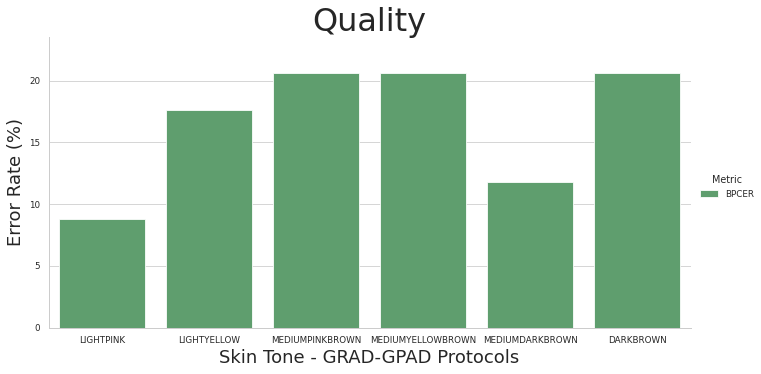

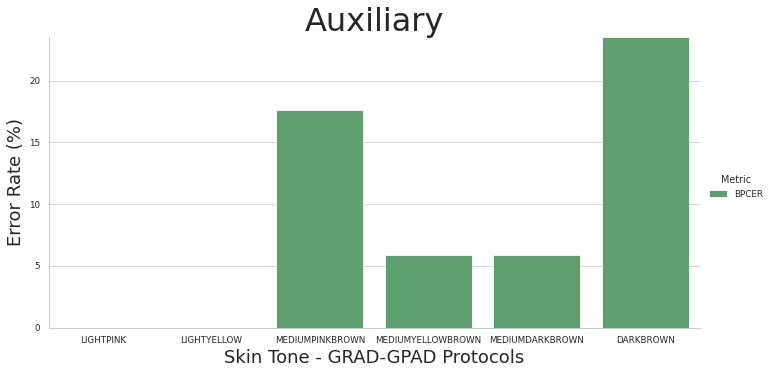

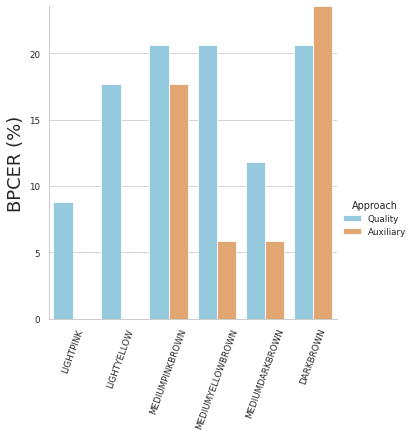

In [ ]:
#@title Skin Tone { run: "auto" }
selected_protocol = "Skin Tone - GRAD-GPAD" #@param ['Skin Tone - GRAD-GPAD', 'Skin Tone - SIW', 'Skin Tone - SIW-M']
selected_metrics = "BPCER" #@param ['BPCER', 'APCER-BPCER', 'HTER-ACER-SACER', 'HTER-ACER-SACER-BPCER', 'HTER', 'ACER', 'SACER']
selected_splits = "6 Splits" #@param ['3 Splits', '6 Splits']

#@markdown Skin Tone protocols:
#@markdown * GRAD-GPAD: 34 Items per Skin Tone (Test)
#@markdown * SIW: 32 Items per Skin Tone (Test)
#@markdown * SIW-M: 2 Items per Skin Tone (Test)

import statistics

def get_df_metrics_by_protocol(metrics, selected_protocol, filtered_protocols, results, results_correspondences):
  protocols_key= f"{selected_protocol} Protocols"
  
  data = {
  "Metric": [],
  "Error Rate (%)": [],
  protocols_key: []
  }

  splits_accumulated = {}
  for protocol in filtered_protocols:
    try:
      subprotocol = protocol.replace(f"{selected_protocol}", "").replace("-", "").replace(" ", "")
      if subprotocol == "ALL":
        continue

      performance_info = results[results_correspondences[protocol]]
      acer_info = performance_info["acer_info"]
      for metric in metrics:
        if metric == "BPCER":
          metric_value = performance_info.get("acer_info", {}).get("aggregate", {}).get("bpcer")
        elif metric == "APCER":
          max_apcer_pai = performance_info.get("acer_info", {}).get("aggregate", {}).get("max_apcer_pai")
          metric_value = performance_info.get("acer_info", {}).get("aggregate", {}).get("apcer_per_pai", {}).get(max_apcer_pai)
        else:
          metric_value = performance_info.get(metric.lower())


        if metric not in splits_accumulated:
          splits_accumulated[metric] = {}


        if selected_splits == "3 Splits":
          splits_accumulated_metric = splits_accumulated[metric]
          if "YELLOW" in subprotocol:
            if "YELLOW" in splits_accumulated_metric:
              metric_value = statistics.mean([metric_value, splits_accumulated_metric.get("YELLOW")])
              subprotocol = "YELLOW"
            else:
              splits_accumulated_metric["YELLOW"] = metric_value
              continue
          if "PINK" in subprotocol:
            if "PINK" in splits_accumulated_metric:
              metric_value = statistics.mean([metric_value, splits_accumulated_metric.get("PINK")])
              subprotocol = "PINK"
            else:
              splits_accumulated_metric["PINK"] = metric_value
              continue
          if "DARK" in subprotocol:
            if "DARK" in splits_accumulated_metric:
              metric_value = statistics.mean([metric_value, splits_accumulated_metric.get("DARK")])
              subprotocol = "DARK"
            else:
              splits_accumulated_metric["DARK"] = metric_value
              continue
          splits_accumulated[metric] = splits_accumulated_metric

        data["Metric"].append(metric)
        data["Error Rate (%)"].append(metric_value)
        data[protocols_key].append(subprotocol)
    except Exception as e:
      print(str(e))
      pass

  df_metrics = pd.DataFrame(data, columns = data.keys())

  return df_metrics

def show_bar_metrics_by_protocol(df_metrics, approach, selected_protocol, max_error_rate, color_palette=None):
  if df_metrics.empty == True:
    print(f"⚠️ >> Warning: {approach} is not available yet")
  else:
    import seaborn as sns
    sns.set(style="whitegrid")
    sns.set_context("paper", rc={"font.size":14,"axes.titlesize":32,"axes.labelsize":18})   
    
    aspect = 2

    g = sns.catplot(x=f'{selected_protocol} Protocols', y='Error Rate (%)', hue='Metric', data=df_metrics, kind='bar', height=5, aspect=aspect, palette=color_palette)
    g.set(ylim=(0, max_error_rate))
    #g.set_xticklabels(rotation=70)
    g.set(title = approach)


def show_comparison(quality_df_metrics, auxiliary_df_metrics, selected_protocol, max_error_rate):

  if selected_splits == "3 Splits":
    quality_df_metrics["Approach"] = ["Quality", "Quality", "Quality"]
    auxiliary_df_metrics["Approach"] = ["Auxiliary", "Auxiliary", "Auxiliary"]
  else:
    quality_df_metrics["Approach"] = ["Quality", "Quality", "Quality", "Quality", "Quality", "Quality"]
    auxiliary_df_metrics["Approach"] = ["Auxiliary", "Auxiliary", "Auxiliary", "Auxiliary", "Auxiliary", "Auxiliary"]
    
  df_metrics = pd.concat([quality_df_metrics, auxiliary_df_metrics])
  
  df_metrics.rename(columns={'Error Rate (%)':'BPCER (%)'}, inplace=True)
  df_metrics.rename(columns={f'{selected_protocol} Protocols':''}, inplace=True)

  if df_metrics.empty == True:
    print(f"⚠️ >> Warning: {approach} is not available yet")
  else:
    import seaborn as sns
    sns.set(style="whitegrid")
    sns.set_context("paper", rc={"font.size":14,"axes.titlesize":32,"axes.labelsize":18})   
    g = sns.catplot(x='', y='BPCER (%)', hue='Approach', data=df_metrics, kind='bar', height=5, aspect=1, palette=['skyblue', 'sandybrown'])
    g.set(ylim=(0, max_error_rate))

    print(color_palette)
    g.set_xticklabels(rotation=70)
    #g.set(title = approach)

metrics, color_palette = get_list_metrics(selected_metrics)


filtered_protocols = [k for k in fancy_names_quality_results_correspondences.keys() if selected_protocol in k]

if selected_protocol == "Skin Tone - SIW":
  filtered_protocols = [k for k in filtered_protocols if "SIW-M" not in k]


df_metrics_quality = get_df_metrics_by_protocol(metrics, selected_protocol, filtered_protocols, quality_results, fancy_names_quality_results_correspondences)
df_metrics_auxiliary = get_df_metrics_by_protocol(metrics, selected_protocol, filtered_protocols, auxiliary_results, fancy_names_auxiliary_results_correspondences)

max_quality = df_metrics_quality.max()
max_auxiliary = df_metrics_auxiliary.max()

max_error_rate = max(max_quality["Error Rate (%)"], max_auxiliary["Error Rate (%)"])

show_bar_metrics_by_protocol(df_metrics_quality, "Quality", selected_protocol, max_error_rate, color_palette)
show_bar_metrics_by_protocol(df_metrics_auxiliary, "Auxiliary", selected_protocol, max_error_rate, color_palette)

show_comparison(df_metrics_quality, df_metrics_auxiliary, selected_protocol, max_error_rate)


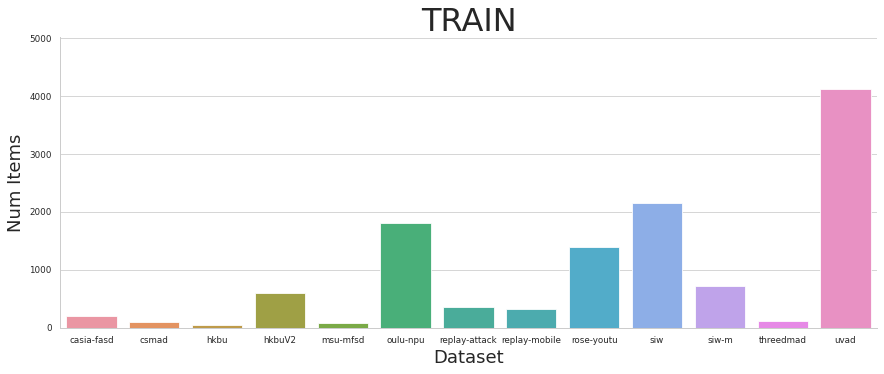

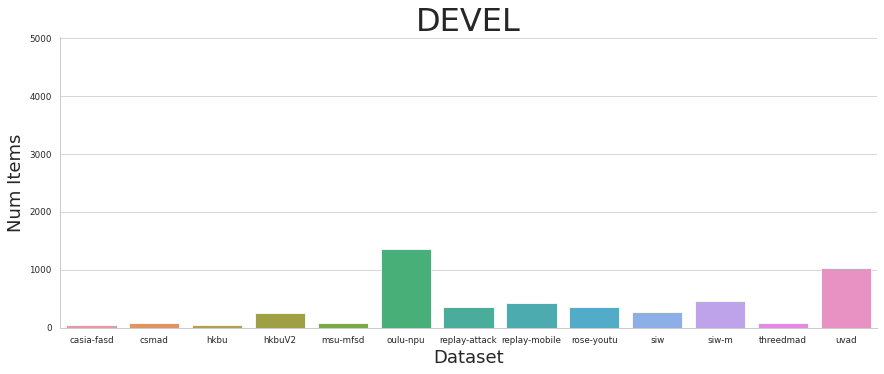

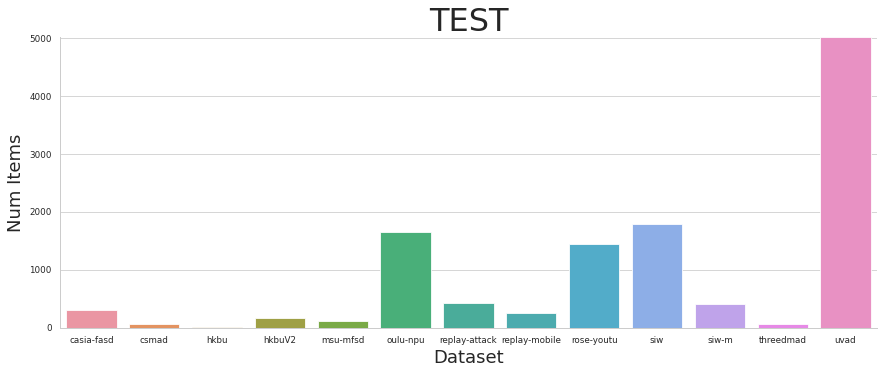

In [ ]:
#@title Protocol Distributions
#@title Set Protocol { run: "auto" }

#@markdown Note: In Unseen-Attack and One-PAI we use all Genuine, so All datasets are present.

selected_protocol = "Gender - GRAD-GPAD - ALL" #@param ['Grandtest', 'Grandtest-Without-SiW-M', 'Grandtest-Without-UVAD', 'Cross-Dataset - CASIA-FASD', 'Cross-Dataset - CSMAD', 'Cross-Dataset - HKBU', 'Cross-Dataset - MSU-MFSD', 'Cross-Dataset - OULU-NPU', 'Cross-Dataset - REPLAY-ATTACK', 'Cross-Dataset - REPLAY-MOBILE', 'Cross-Dataset - ROSE-YOUTU', 'Cross-Dataset - SIW', 'Cross-Dataset - 3DMAD', 'Cross-Dataset - UVAD', 'Cross-Dataset - SIW-M', 'Cross-Dataset - HKBUV2', 'Cross-Device - WEBCAM', 'Cross-Device - MOBILE-TABLET', 'Cross-Device - DIGITAL_CAMERA', 'Unseen-Attack - PRINT', 'Unseen-Attack - REPLAY', 'Unseen-Attack - MASK', 'LODO - CASIA-FASD', 'LODO - CSMAD', 'LODO - HKBU', 'LODO - MSU-MFSD', 'LODO - OULU-NPU', 'LODO - REPLAY-ATTACK', 'LODO - REPLAY-MOBILE', 'LODO - ROSE-YOUTU', 'LODO - SIW', 'LODO - 3DMAD', 'LODO - UVAD', 'LODO - SIW-M', 'LODO - HKBUV2', 'One-PAI - PRINT', 'One-PAI - REPLAY', 'One-PAI - MASK', 'Age - GRAD-GPAD - ALL', 'Age - GRAD-GPAD - YOUNG', 'Age - GRAD-GPAD - ADULT', 'Age - GRAD-GPAD - SENIOR', 'Age - SIW-M - ALL', 'Age - SIW-M - YOUNG', 'Age - SIW-M - ADULT', 'Age - SIW-M - SENIOR', 'Age - UVAD - ALL', 'Age - UVAD - YOUNG', 'Age - UVAD - ADULT', 'Age - UVAD - SENIOR', 'Age - REPLAY-MOBILE - ALL', 'Age - REPLAY-MOBILE - YOUNG', 'Age - REPLAY-MOBILE - ADULT', 'Age - REPLAY-MOBILE - SENIOR', 'Age - MSU-MFSD - ALL', 'Age - MSU-MFSD - YOUNG', 'Age - MSU-MFSD - ADULT', 'Age - MSU-MFSD - SENIOR', 'Gender - CASIA-FASD - ALL', 'Gender - CASIA-FASD - MALE', 'Gender - CASIA-FASD - FEMALE', 'Gender - CSMAD - ALL', 'Gender - CSMAD - MALE', 'Gender - CSMAD - FEMALE', 'Gender - MSU-MFSD - ALL', 'Gender - MSU-MFSD - MALE', 'Gender - MSU-MFSD - FEMALE', 'Gender - OULU-NPU - ALL', 'Gender - OULU-NPU - MALE', 'Gender - OULU-NPU - FEMALE', 'Gender - REPLAY-ATTACK - ALL', 'Gender - REPLAY-ATTACK - MALE', 'Gender - REPLAY-ATTACK - FEMALE', 'Gender - REPLAY-MOBILE - ALL', 'Gender - REPLAY-MOBILE - MALE', 'Gender - REPLAY-MOBILE - FEMALE', 'Gender - ROSE-YOUTU - ALL', 'Gender - ROSE-YOUTU - MALE', 'Gender - ROSE-YOUTU - FEMALE', 'Gender - SIW - ALL', 'Gender - SIW - MALE', 'Gender - SIW - FEMALE', 'Gender - 3DMAD - ALL', 'Gender - 3DMAD - MALE', 'Gender - 3DMAD - FEMALE', 'Gender - UVAD - ALL', 'Gender - UVAD - MALE', 'Gender - UVAD - FEMALE', 'Gender - SIW-M - ALL', 'Gender - SIW-M - MALE', 'Gender - SIW-M - FEMALE', 'Gender - HKBUV2 - ALL', 'Gender - HKBUV2 - MALE', 'Gender - HKBUV2 - FEMALE', 'Gender - GRAD-GPAD - ALL', 'Gender - GRAD-GPAD - MALE', 'Gender - GRAD-GPAD - FEMALE', 'Gender - GRAD-GPAD (NO SIW-M) - ALL', 'Gender - GRAD-GPAD (ONLY SIW-M TEST) - ALL', 'Gender - GRAD-GPAD (NO SIW-M) - MALE', 'Gender - GRAD-GPAD (ONLY SIW-M TEST) - MALE', 'Gender - GRAD-GPAD (NO SIW-M) - FEMALE', 'Gender - GRAD-GPAD (ONLY SIW-M TEST) - FEMALE', 'Skin Tone - GRAD-GPAD - ALL', 'Skin Tone - GRAD-GPAD - LIGHT-PINK', 'Skin Tone - GRAD-GPAD - LIGHT-YELLOW', 'Skin Tone - GRAD-GPAD - MEDIUM-PINK-BROWN', 'Skin Tone - GRAD-GPAD - MEDIUM-YELLOW-BROWN', 'Skin Tone - GRAD-GPAD - MEDIUM-DARK-BROWN', 'Skin Tone - GRAD-GPAD - DARK-BROWN', 'Skin Tone - SIW-M - ALL', 'Skin Tone - SIW-M - LIGHT-PINK', 'Skin Tone - SIW-M - LIGHT-YELLOW', 'Skin Tone - SIW-M - MEDIUM-PINK-BROWN', 'Skin Tone - SIW-M - MEDIUM-YELLOW-BROWN', 'Skin Tone - SIW-M - MEDIUM-DARK-BROWN', 'Skin Tone - SIW-M - DARK-BROWN', 'Skin Tone - SIW - ALL', 'Skin Tone - SIW - LIGHT-PINK', 'Skin Tone - SIW - LIGHT-YELLOW', 'Skin Tone - SIW - MEDIUM-PINK-BROWN', 'Skin Tone - SIW - MEDIUM-YELLOW-BROWN', 'Skin Tone - SIW - MEDIUM-DARK-BROWN', 'Skin Tone - SIW - DARK-BROWN']
import seaborn as sns

def show_protocol_stats():
  df_stats = get_df_data_stats(selected_protocol)
  #  print(df_stats)
  g = sns.FacetGrid(df_stats, col="Subset", height=3, aspect=1)
  g.map(sns.barplot, "Type Item", "Total")
  g.set(ylim=(0, 100))


#show_protocol_stats()

def get_df_stats_by_subset(experiment_disribution):
  
  df_stats_by_subset = {}
  for subset in ["train", "devel", "test"]:
    subset_distribution = experiment_disribution[subset]
    data = {
      "Dataset": [],
      "Num Items": [],
    }
    for dataset_name, num_items in subset_distribution.items():
      data["Dataset"].append(dataset_name)
      data["Num Items"].append(num_items)
    df_stats = pd.DataFrame(data, columns = data.keys())
    df_stats_by_subset[subset] = df_stats
  return df_stats_by_subset

def show_bar_stats_by_subset(df_stats, subset, max_num_items):
  if df_stats.empty == True:
    print(f"⚠️ >> Warning: {subset} is not available yet")
  else:
    import seaborn as sns
    sns.set(style="whitegrid")
    sns.set_context("paper", rc={"font.size":14,"axes.titlesize":32,"axes.labelsize":18})   
    
    height = 5
    aspect = 2.5

    g = sns.catplot(x="Dataset", y="Num Items", data=df_stats, kind='bar', height=height, aspect=aspect)
    g.set(ylim=(0, max_num_items))
    #g.set_xticklabels(rotation=70)
    g.set(title = subset)


selected_protocol = fancy_names_quality_results_correspondences[selected_protocol]

if selected_protocol not in protocol_subset_stats:
  print("not available")
else:
  experiment_disribution = protocol_subset_stats[selected_protocol]
  df_stats_by_subset = get_df_stats_by_subset(experiment_disribution)

  max_tmp = max(df_stats_by_subset["train"].max()[1], df_stats_by_subset["devel"].max()[1])
  max_num_items = max(max_tmp, df_stats_by_subset["test"].max()[1])



  for subset, df_stats in df_stats_by_subset.items():
    show_bar_stats_by_subset(df_stats, subset.upper(), max_num_items)




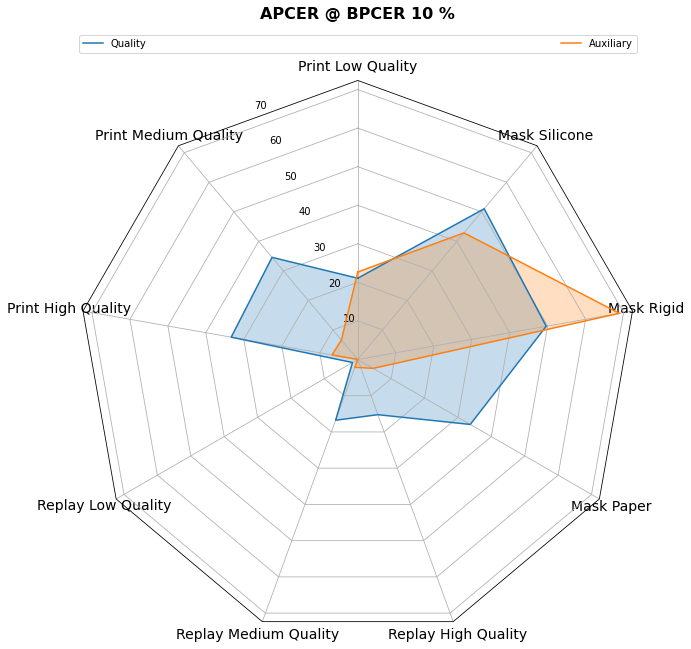

In [ ]:
#@title  Radar Chart Grandtest
#@title Set Protocol { run: "auto" }

selected_protocol = "Grandtest-Without-SiW-M" #@param ['Grandtest', 'Grandtest-Without-SiW-M']
import seaborn as sns


import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from matplotlib.colors import ListedColormap
import pandas as pd
import matplotlib.pyplot as plt



def get_df_global_metrics(values, metric):

  metric_key = f"{metric.upper()} (%)"
  data = {
  metric_key: [],
  "Working Point": [],
  }

  try:
    for key, value in values.items():
      wp = key.upper().replace("_", " ")
      data[metric_key].append(value if value <= 100 else 100)
      data["Working Point"].append(f"{wp} %")
  except Exception as err:
    print(err)
    pass

  df_metrics = pd.DataFrame(data, columns = data.keys())
  return df_metrics

def show_global_metrics(quality_df_wp, auxiliary_df_wp,  metric):

    metric_key = f"{metric.upper()} (%)"

    plt.plot(quality_df_wp["Working Point"], quality_df_wp[metric_key], linewidth=3)
    plt.plot(auxiliary_df_wp["Working Point"], auxiliary_df_wp[metric_key], linewidth=3)

    plt.legend([f"{metric_key} (Quality)", f"{metric_key} (Auxiliary)"], loc='upper right')
    plt.xticks(rotation=60)

    plt.show()

def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels, fontsize=14)
            #self.set_thetagrids(np.degrees(theta), labels, cmap=ListedColormap(colors))

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta




def plot_radar(pais, values):
  data = [pais, values]

  N = len(data[0])
  theta = radar_factory(N, frame='polygon')

  spoke_labels = data.pop(0)
  title, case_data = data[0]

  fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='radar'))
  fig.subplots_adjust(top=0.85, bottom=0.05)

  ax.set_rgrids([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
  ax.set_title(title,  position=(0.5, 1.1), ha='center', fontsize=16, fontweight='bold')
  for d in case_data:
      line = ax.plot(theta, d)
      ax.fill(theta, d,  alpha=0.25)

  import string
  varlabels = [string.capwords(spoke_label) for spoke_label in spoke_labels]
  ax.set_varlabels(varlabels)
  ax.legend(["Quality", "Auxiliary"],
            bbox_to_anchor=(0., 1.05, 1., .102), 
            loc='lower left',
            ncol=2, mode="expand", borderaxespad=0.)

  plt.show()


quality_indeepth_info = quality_grandtest_fixing_working_points[selected_protocol]["acer_info"]
auxiliary_indeepth_info = auxiliary_grandtest_fixing_working_points[selected_protocol]["acer_info"]


for target_metric in ["bpcer", "apcer"]:
  quality_target_info_wp = quality_indeepth_info["specific"]["relative_working_points"][target_metric]
  auxiliary_target_info_wp = auxiliary_indeepth_info["specific"]["relative_working_points"][target_metric]

  quality_df_quality_wp = get_df_global_metrics(quality_target_info_wp, target_metric)
  auxiliary_df_quality_wp = get_df_global_metrics(auxiliary_target_info_wp, target_metric)

  #show_global_metrics(quality_df_quality_wp, auxiliary_df_quality_wp, target_metric)


quality_apcer_per_pai_fixing_bpcer = quality_indeepth_info["specific"]["apcer_per_pai_fixing_bpcer"]
auxiliary_apcer_per_pai_fixing_bpcer = auxiliary_indeepth_info["specific"]["apcer_per_pai_fixing_bpcer"]

working_points = ["apcer_fixing_bpcer5", "apcer_fixing_bpcer10", "apcer_fixing_bpcer15", "apcer_fixing_bpcer20", "apcer_fixing_bpcer30", "apcer_fixing_bpcer40"]
working_points = ["apcer_fixing_bpcer10"]

for selected_working_point in working_points:

  title_tmp = selected_working_point.replace("_fixing_", " @ ").upper()
  title = f"{title_tmp} %".replace("BPCER", "BPCER ")
  fixed_apcers = {}
  pais = []
  quality_apcers = []
  auxiliary_apcers = []

  for pai in quality_apcer_per_pai_fixing_bpcer.keys():
    fancy_pai = pai.replace("_", " ").upper()
    pais.append(fancy_pai)

    quality_apcer = quality_apcer_per_pai_fixing_bpcer[pai][selected_working_point]
    auxiliary_apcer = auxiliary_apcer_per_pai_fixing_bpcer[pai][selected_working_point]

    quality_apcers.append(quality_apcer if quality_apcer<= 100 else 100)
    auxiliary_apcers.append(auxiliary_apcer if auxiliary_apcer<= 100 else 100)

  values = (title, [quality_apcers, auxiliary_apcers])

  plot_radar(pais, values)


filtered_protocols: ['Cross-Dataset - CASIA-FASD', 'Cross-Dataset - REPLAY-ATTACK', 'Cross-Dataset - REPLAY-MOBILE', 'Cross-Dataset - MSU-MFSD', 'Cross-Dataset - OULU-NPU', 'Cross-Dataset - SIW', 'Cross-Dataset - UVAD', 'Cross-Dataset - 3DMAD', 'Cross-Dataset - HKBU', 'Cross-Dataset - HKBUV2', 'Cross-Dataset - CSMAD', 'Cross-Dataset - ROSE-YOUTU', 'Cross-Dataset - SIW-M']
Quality
Auxiliary


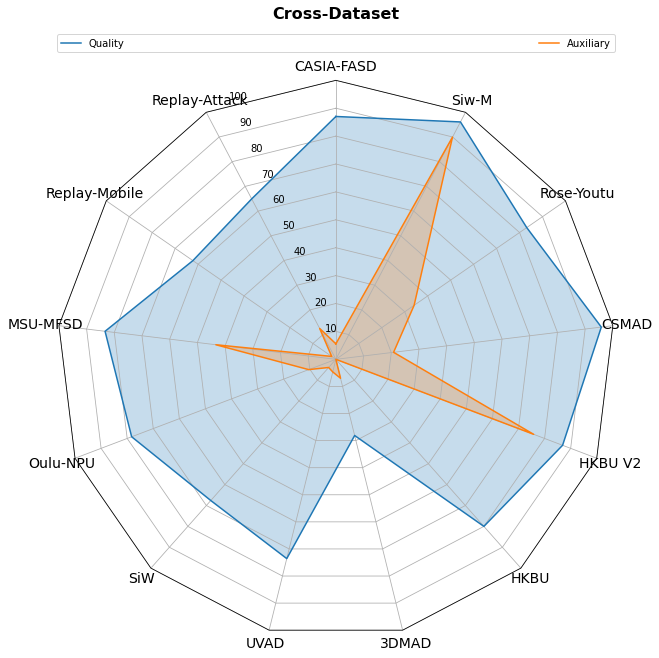

In [ ]:
#@title  Radar Chart Generalization
#@title Set Protocol { run: "auto" }

selected_protocol = "Cross-Dataset" #@param ['Cross-Dataset', 'LODO', 'Unseen-Attack', 'Cross-Device']
import seaborn as sns


import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from matplotlib.colors import ListedColormap
import pandas as pd
import matplotlib.pyplot as plt

def get_filtered_and_sorted_protocols():
  filtered_protocols = [k for k in fancy_names_quality_results_correspondences.keys() if selected_protocol in k]
  
  predefined_order = {
      "CASIA-FASD": 1,    # Print, Replay
      "REPLAY-ATTACK": 2, # Print, Replay
      "REPLAY-MOBILE": 3, # Print, Replay
      "MSU-MFSD": 4,      # Print, Replay
      "OULU-NPU": 5,      # Print, Replay
      "SIW": 6,          # Print, Replay
      "UVAD": 7,        # Replay
      "3DMAD": 8,        # Mask
      "HKBU": 9,         # Mask
      "HKBUV2": 10,       # Mask
      "CSMAD": 11,       # Print, Mask
      "ROSE-YOUTU": 12,   # Print, Replay, Mask
      "SIW-M": 13         # Print, Replay, Mask, MakeUp, Partial
  }

  ordered_filetered_protocols = {}
  for protocol in filtered_protocols:
    for k, v in predefined_order.items():
      if k in protocol:
        ordered_filetered_protocols[protocol] = v

  if len(ordered_filetered_protocols):
    sorted_protocols = [k for k, v in sorted(ordered_filetered_protocols.items(), key=lambda item: item[1])]
  else:
    sorted_protocols = filtered_protocols

  return sorted_protocols 

filtered_protocols = get_filtered_and_sorted_protocols()

print(f"filtered_protocols: {filtered_protocols}")


def get_df_apcer_max_fixing_bpcer(results, protocols, bpcer_wp, title):

  
  external_radar_values = "Datasets"
  evaluated_metric =  f"APECER max @ BPCER={bpcer_wp}%"

  data = {
  external_radar_values: [],
  evaluated_metric: [],
  }

  data_dict = {}

  fancy_names = {
      "CASIA-FASD": "CASIA-FASD",    # Print, Replay
      "REPLAY-ATTACK": "Replay-Attack", # Print, Replay
      "REPLAY-MOBILE": "Replay-Mobile", # Print, Replay
      "MSU-MFSD": "MSU-MFSD",      # Print, Replay
      "OULU-NPU": "Oulu-NPU",      # Print, Replay
      "SIW": "SiW",          # Print, Replay
      "UVAD": "UVAD",        # Replay
      "3DMAD": "3DMAD",        # Mask
      "HKBU": "HKBU",         # Mask
      "HKBUV2": "HKBU V2",       # Mask
      "CSMAD": "CSMAD",       # Print, Mask
      "ROSE-YOUTU": "Rose-Youtu",   # Print, Replay, Mask
      "SIW-M": "Siw-M"  # Print, Replay, Mask, MakeUp, Partial
  }

  for protocol in protocols: 
    try:
      original_protocol = fancy_names_quality_results_correspondences[protocol]
      value = results[original_protocol]["acer_info"]["specific"]["relative_working_points"]["apcer"][f"bpcer_{bpcer_wp}"]
      data[external_radar_values].append(protocol.replace(title, "").replace(" - ", ""))
      data[evaluated_metric].append(value)

      name = protocol.replace(title, "").replace(" - ", "")
      fancy_name = fancy_names.get(name, name)
      data_dict[fancy_name] = value
    except Exception as err:
      print(f"Error in protocol {protocol}")
      print(err)
      pass

  df_metrics = pd.DataFrame(data, columns = data.keys())
  return df_metrics, data_dict

def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels, fontsize=14)
            #self.set_thetagrids(np.degrees(theta), labels, cmap=ListedColormap(colors))

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta




def plot_radar(pais, values):
  data = [pais, values]

  N = len(data[0])
  theta = radar_factory(N, frame='polygon')

  spoke_labels = data.pop(0)
  title, case_data = data[0]

  fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='radar'))
  fig.subplots_adjust(top=0.85, bottom=0.05)

  ax.set_rgrids([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

  ax.set_ylim([0, 100])
  ax.set_title(title,  position=(0.5, 1.1), ha='center', fontsize=16, fontweight='bold')
  for d in case_data:
      line = ax.plot(theta, d)
      ax.fill(theta, d,  alpha=0.25)

  #import string
  #varlabels = [string.capwords(spoke_label) for spoke_label in spoke_labels]
  varlabels = spoke_labels
  ax.set_varlabels(varlabels)
  ax.legend(["Quality", "Auxiliary"],
            bbox_to_anchor=(0., 1.05, 1., .102), 
            loc='lower left',
            ncol=2, mode="expand", borderaxespad=0.)

  plt.show()

bpcer_wp = 10
subprotocols_values = "Datasets"
evaluated_metric =  f"APECER max @ BPCER={bpcer_wp}%"

print("Quality")
quality_df_quality_apcer_max_fixing_bpcer, dict_quality_df_quality_apcer_max_fixing_bpcer  = get_df_apcer_max_fixing_bpcer(quality_grandtest_fixing_working_points, filtered_protocols, bpcer_wp, selected_protocol)
print("Auxiliary")
auxiliary_df_quality_apcer_max_fixing_bpcer, dict_auxiliary_df_quality_apcer_max_fixing_bpcer  = get_df_apcer_max_fixing_bpcer(auxiliary_grandtest_fixing_working_points, filtered_protocols, bpcer_wp, selected_protocol)

#print(f"quality_df_quality_apcer_max_fixing_bpcer: {quality_df_quality_apcer_max_fixing_bpcer}")
#print(f"auxiliary_df_quality_apcer_max_fixing_bpcer: {auxiliary_df_quality_apcer_max_fixing_bpcer}")#
#print(f"dict_quality_df_quality_apcer_max_fixing_bpcer: {dict_quality_df_quality_apcer_max_fixing_bpc#er}")
#print(f"dict_auxiliary_df_quality_apcer_max_fixing_bpcer: {dict_auxiliary_df_quality_apcer_max_fixing_bpcer}")

title = selected_protocol
subprotocols = []
quality_apcers = []
auxiliary_apcers = []

keys = dict_quality_df_quality_apcer_max_fixing_bpcer.keys()
for subprotocol in keys:
  subprotocols.append(subprotocol)


  quality_apcer = dict_quality_df_quality_apcer_max_fixing_bpcer[subprotocol]
  auxiliary_apcer = dict_auxiliary_df_quality_apcer_max_fixing_bpcer[subprotocol]

  quality_apcers.append(quality_apcer if quality_apcer<= 100 else 100)
  auxiliary_apcers.append(auxiliary_apcer if auxiliary_apcer<= 100 else 100)

values = (title, [quality_apcers, auxiliary_apcers])

plot_radar(subprotocols, values)

